Optical Character Resolution (OCR)
Text Processing code

Code by Ayush Agarwal , IIT BHU ECE'24, Infoedge DS

In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

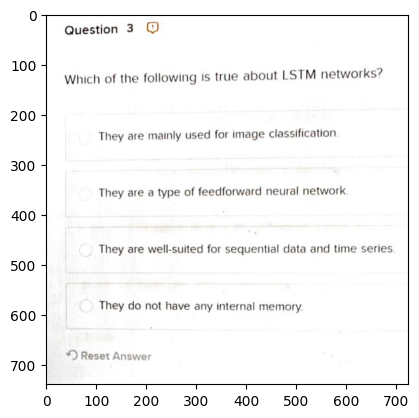

In [617]:
images = []

# Code to read the images in opencv
for i in range(1,6):
  capture = cv2.imread("/content/Capture_"+str(i)+".JPG")
  images.append(capture)

# Code to display 1 image
plt.imshow(images[4])
plt.show()

# Code to display all the images 1 by 1
# for i in range(0,5):
#   plt.imshow(images[i])
#   plt.show()

In [618]:
# Just doing pip install pytesseract does not work
# As stated in the link below, pytesseract needs few c++ libraries also which can be installed like this
# https://stackoverflow.com/questions/51696446/tesseract-installation-in-google-colaboratory
# ! apt install tesseract-ocr
# ! apt install libtesseract-dev

# Just a checker function to check presence of pytesseract
# !tesseract -v

In [619]:
# !pip install pytesseract
import pytesseract

Question 3 ©

Which of the following is true about LSTM networks?
They are mainly used for image classification
They are a type of feedforward neural network
They are well-suited for samen data and time series.

They do not have any internal memory.

¥) Reset Answer



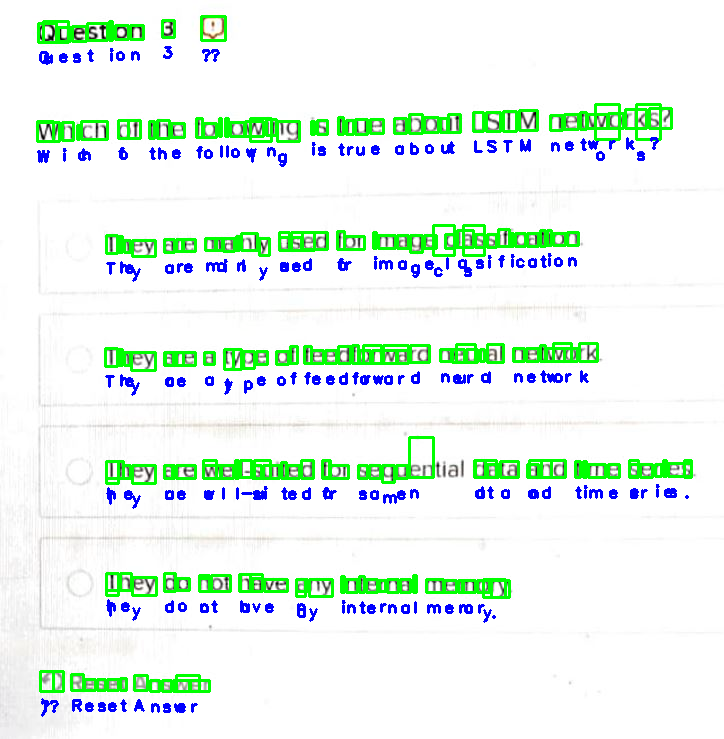

In [620]:
# Pytesseract official documentation - https://pypi.org/project/pytesseract/

# To print pytesseract output for all the images via loop
# for i in range(0,5):
#   #pytesseract works on rgb whereas opencv works on bgr so we need to convert to rgb
#   images[i] = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
#   print(pytesseract.image_to_string(images[i]))
#   plt.imshow(images[i])
#   plt.show()

# A lot of the images were even difficult for a state of the art OCR library like pytesseract to read
# Good thing I first decided to check via pytesseract and then start my own modelling
# So I will use only the Capture_5 image as it is very clean

# img = images[4]
img = cv2.imread("/content/Capture_5.JPG")
#pytesseract works on rgb whereas opencv works on bgr so we need to convert to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img))

#image to boxes is used for detecting the letters
boxes1 = pytesseract.image_to_boxes(img)
# print(boxes1)
# this prints the boxes details

# https://github.com/ayush-agarwal-0502/OpenCV-projects-/blob/main/word%20detector.py
# my old code for pytesseract
img_with_text = img
W,H,_ = img.shape
counter = 0
# splitlines splits the data according to the new lines between them
for box in boxes1.splitlines() :
    counter = counter + 1
    #in each line the data is split by a gap of a space , so we make them into groups of data
    # so that each detected letter has an array of data dedicated to it
    box = box.split(' ')
    x1,y1,w1,h1 = int(box[1]),int(box[2]),int(box[3]),int(box[4])
    #the problem is that in opencv the origin is at left top whereas in pytesseract it is at bottom left
    #so whenever we use their functions , they return coordinates according to their own origin
    #so we need to do the math and convert them properly
    #code to draw rectangles around each letter
    cv2.rectangle(img_with_text,((x1),(W-y1)),((w1),(W-h1)),(0,255,0),2)
    cv2.putText(img_with_text,box[0],((x1),(W-y1+20)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2)

# cv2.imshow("image with text ",img)
# DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash

from google.colab.patches import cv2_imshow
cv2_imshow(img_with_text)


(739, 724, 3)


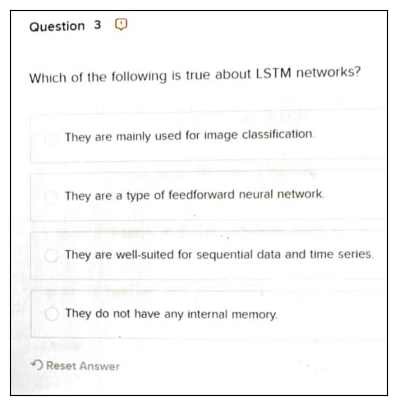

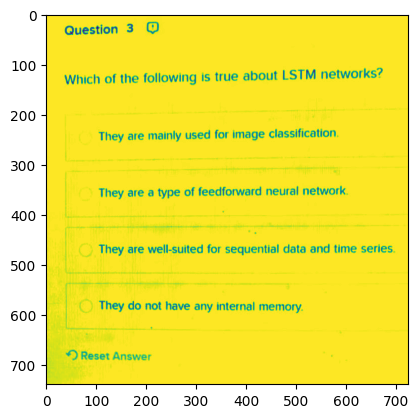

(739, 724)


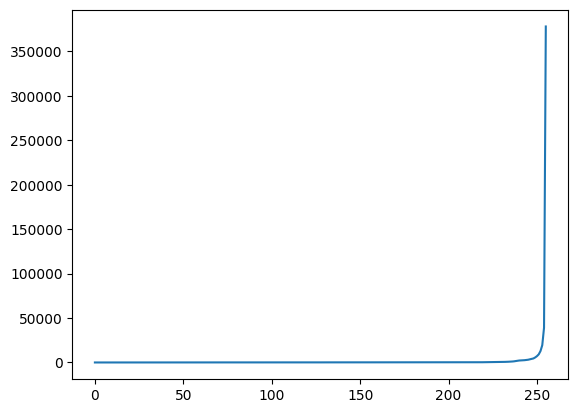

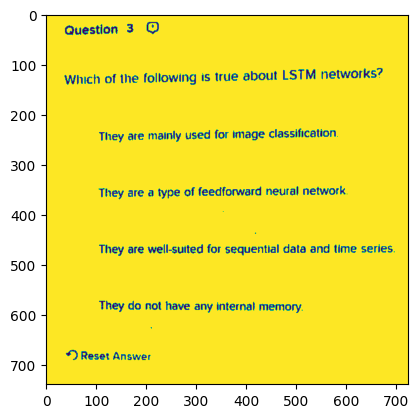

In [621]:
img = cv2.imread("/content/Capture_5.JPG")
print(img.shape)
# As we can see this is a BGR image (opencv works on bgr instead of rgb) (3 channels)

# opencv dosent have much help to resize tho it helps in seeing full image
# cv2_imshow(img)

# matplotlib for seeing the image
plt.figure(figsize=(5,5))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

# Convert BGR to HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

plt.imshow(img)
plt.show()
print(img.shape)
# now it is grayscale

# opencv docs are shit I better use something else

# making image histogram
# https://www.geeksforgeeks.org/opencv-python-program-analyze-image-using-histogram/
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
# calculate frequency of pixels in range 0-255
hist = cv2.calcHist([img],[0],None,[256],[0,256])
# show the plotting graph of an image
plt.plot(hist)
plt.show()

# Otsu thresholding
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(img)
plt.show()

In [622]:
# https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html
# Very good blog on filters in image

In [623]:
# This code is meant for when we have blocks of text but we have mcq so space between lines would be huge so we can't use this properly

# # This code takes in a thresholded image, then draws a rectangle around all the non blank things (assumed text)
# # then gets the angle of that rectangle, then finds the center about which the image would be rotated
# # then applies rotation and hence the text becomes parallel to the image

# def align_text(im):
#   coords = np.column_stack(np.where(img > 0))
#   angle = cv2.minAreaRect(coords)[-1]
#   if angle < -45:
#     angle = -(90 + angle)
#   else:
#     angle = -angle
#   h,w = img.shape
#   center = (w // 2, h // 2)

#   M = cv2.getRotationMatrix2D(center, angle, 1.0)
#   rotated = cv2.warpAffine(img, M, (w, h),
#             flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#   return rotated
# # align image text
# img = align_text(img)
# # display rotated and aligned image
# plt.imshow(img)
# plt.show()

In [624]:
# What this cell does -
# We invert the image then we take row sum
# jo line ke beech me gaps hai unka sum 0 hoga obvio
# we can also print the array and see that pattern
# now we can get the individual rows as segments (segs)

# img = 255-img
img = cv2.bitwise_not(img)
# print(img)

# split text into rows
# find sum of column values, row-wise

# a is row sum
a = np.sum(img, axis=1)
# print(a)

rows = []
seg = []

for i in range(0,len(a)):
  if a[i] > 0:
    seg.append(i)
  if ((a[i] == 0) & (len(seg) >= 5)):
    rows.append(seg)
    seg = []

# at the end of the loop if there is text at the bottom
if len(seg) > 0:
  rows.append(seg)

# number of row segments
print("Number of rows detected : ")
print(len(rows))

# print(rows)
img = cv2.bitwise_not(img)

Number of rows detected : 
7


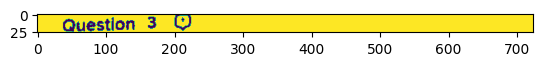

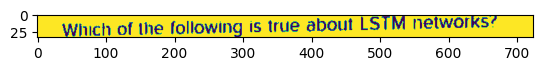

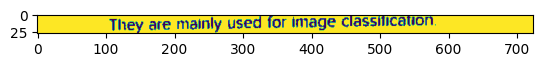

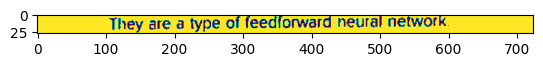

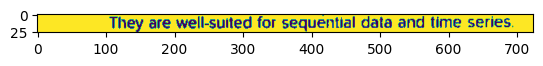

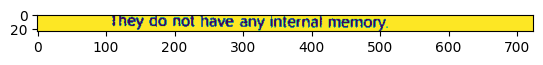

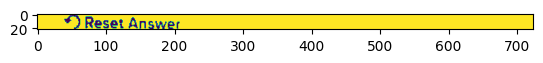

In [625]:
# These are the lines extracted :

lines = []

for i in range(0,len(rows)):
  lines.append(img[rows[i]][:])
  plt.imshow(img[rows[i]][:])
  plt.show()

In [626]:
# Regionprops making the whole line as 1 blob hence not so good working
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

# from skimage.draw import ellipse
# from skimage.measure import label, regionprops, regionprops_table
# from skimage.transform import rotate

# import math

# regions = regionprops(img[rows[1]][:])

# fig, ax = plt.subplots()
# ax.imshow(img[rows[1]][:], cmap=plt.cm.gray)

# for props in regions:
#     y0, x0 = props.centroid
#     orientation = props.orientation
#     x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
#     y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
#     x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
#     y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

#     ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
#     ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
#     ax.plot(x0, y0, '.g', markersize=15)

#     minr, minc, maxr, maxc = props.bbox
#     bx = (minc, maxc, maxc, minc, minc)
#     by = (minr, minr, maxr, maxr, minr)
#     ax.plot(bx, by, '-b', linewidth=2.5)

# # ax.axis((0, 600, 600, 0))
# plt.show()

In [627]:
# # Juest checking lines aagai ya nahi , aa gayi hai acche se confirmed
# # for i in range(0,len(lines)):
# #   plt.imshow(lines[i])
# #   plt.show()

# # https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html

# from skimage import data
# from skimage.feature import blob_dog, blob_log, blob_doh
# from skimage.color import rgb2gray
# import math

# blobs_log = blob_log(lines[1], max_sigma=30, num_sigma=10, threshold=0.1)

# # Compute radii in the 3rd column.
# blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

# blobs_dog = blob_dog(lines[1], max_sigma=30, threshold=0.1)
# blobs_dog[:, 2] = blobs_dog[:, 2] * math.sqrt(2)

# blobs_doh = blob_doh(lines[1], max_sigma=30, threshold=0.01)

# blobs_list = [blobs_log, blobs_dog, blobs_doh]
# colors = ['yellow', 'lime', 'red']
# titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
# sequence = zip(blobs_list, colors, titles)

# fig, axes = plt.subplots(3, 1, figsize=(9, 5), sharex=True, sharey=True)
# ax = axes.ravel()

# for idx, (blobs, color, title) in enumerate(sequence):
#     ax[idx].set_title(title)
#     ax[idx].imshow(lines[1])
#     for blob in blobs:
#         y, x, r = blob
#         c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
#         ax[idx].add_patch(c)
#     ax[idx].set_axis_off()

# plt.tight_layout()
# plt.show()

In [628]:
# EROSION and DILATION code

# Here white is background and black is text so everything will work in reverse

# temp_img = cv2.resize(lines[1], (0, 0), fx = 10, fy = 10)
# cv2_imshow(temp_img)

# erosion

# Taking a matrix of size 5 as the kernel
kernel = np.ones((3, 10), np.uint8)

for line in lines:
  line = cv2.dilate(line,kernel,iterations=3)

# temp_img = cv2.erode(temp_img, kernel, iterations=4)

# cv2_imshow(temp_img)

# lines[1] = temp_img
print(lines[1].shape)

(33, 724)


In [629]:
# # Even a basic CV2 contour detector and bounding box maker is performing pretty well I see
# After lots of hits and trials I give up on this shit , some alphabets are formed perfect but most are shit

# words = []
# word = []
# contours,_ = cv2.findContours(lines[2],cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# H,W = lines[1].shape
# #now drawing a rectangle around the detected object
# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     # cv2.rectangle(lines[1],(x,y),(x+w,y+h),(0,255,0),1)
#     if(h>(w*0.75) and h>(0.4*H)):
#       word = (lines[2][y:y + h, x:x + w])
#       words.append(word)
#       word = []

# cv2_imshow(lines[2])
# plt.figure(figsize=(10,4))
# plt.imshow(lines[2])
# plt.show()

# # Print number of detected words
# print(len(words))

# plt.imshow(words[0])  #, cmap='gray', Use cmap='gray' for grayscale images
# plt.show()

# for word in words:
#   plt.imshow(word)
#   plt.show()


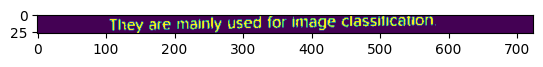

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  510  510  510 1020 4080 4335
 4080  510  510  510  255    0    0 3570 4080 3570    0    0  510  765
  765 2805 2805  765    0    0 1530 2550 2805 1785 1530 1530 1530 1530
 2295 1530  765    0  765 1530 2295 2550 2550 1785 1785 1530 1785 1275
  765    0    0    0    0    0    0    0    0    0 1275 2040 2295 1785
 1530 1530 1275 3060 3060 2040    0    0 2295 3060 3060  510  255  255
    0  510 1785 2550 3060 1530 1275 1275 1275 1530 2295 1530 1020    0
    0 

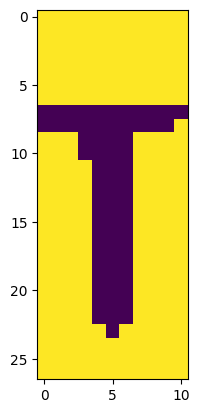

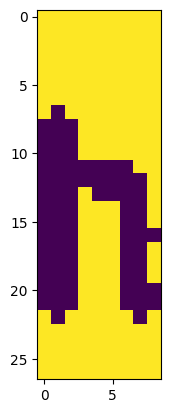

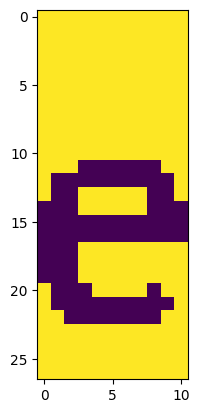

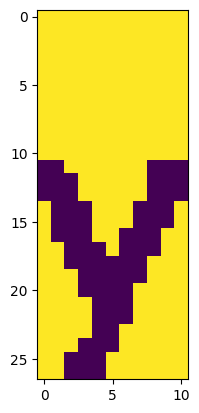

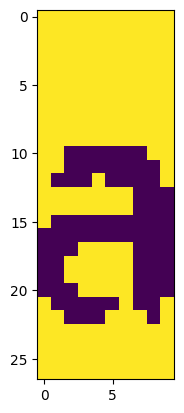

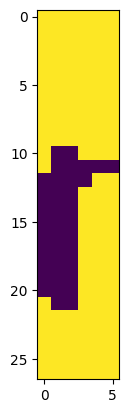

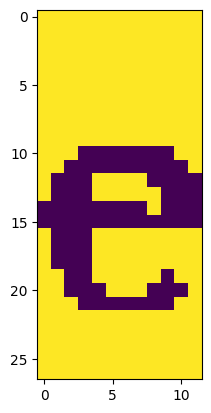

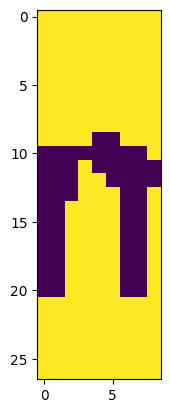

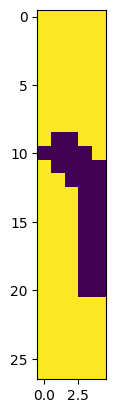

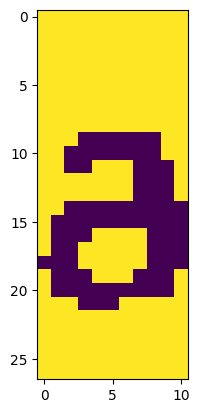

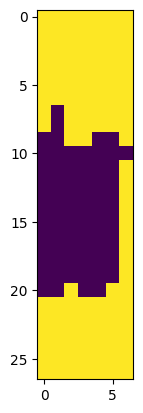

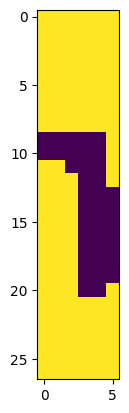

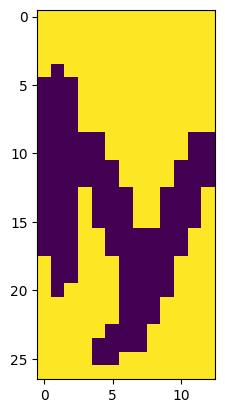

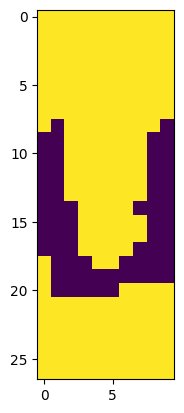

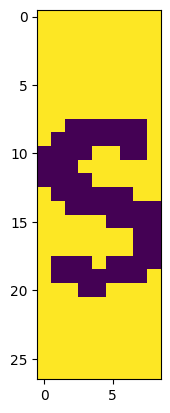

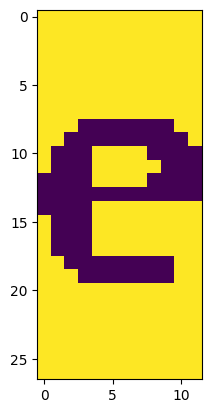

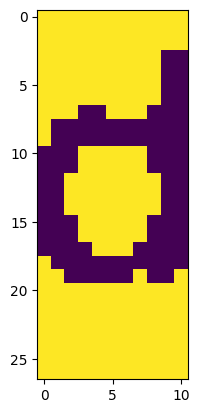

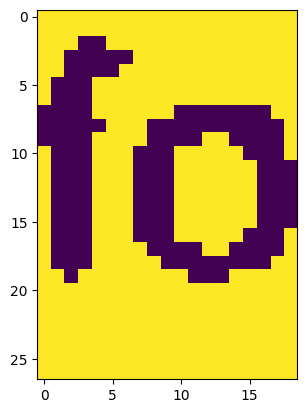

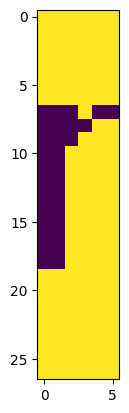

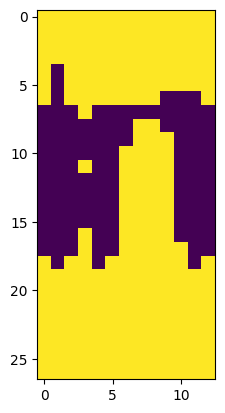

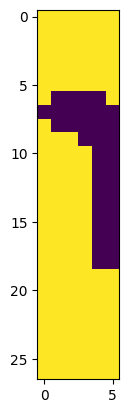

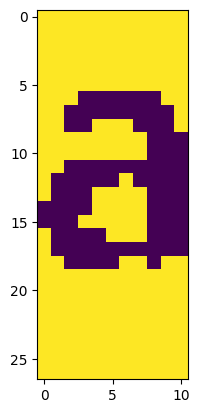

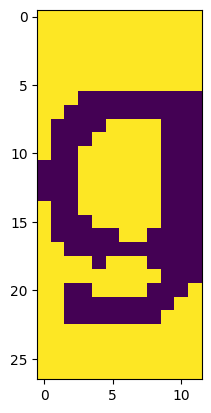

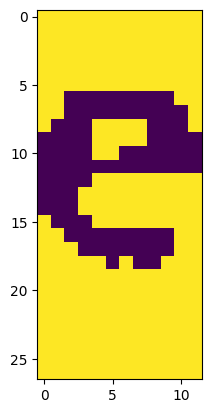

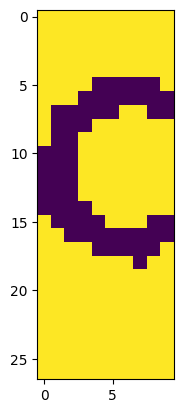

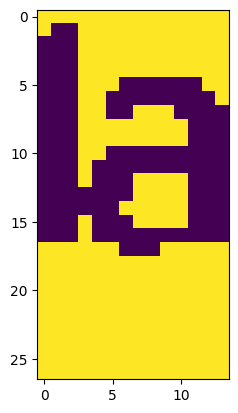

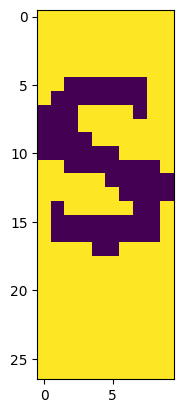

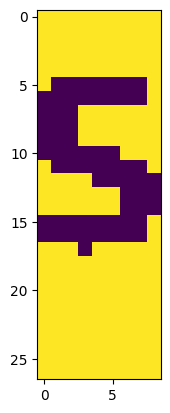

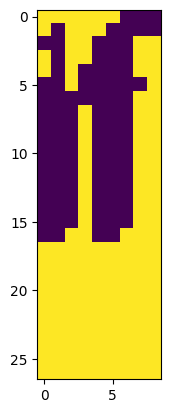

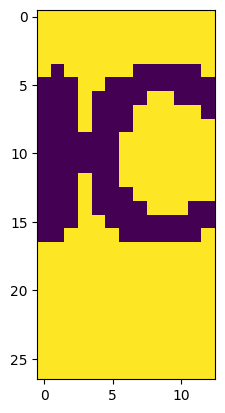

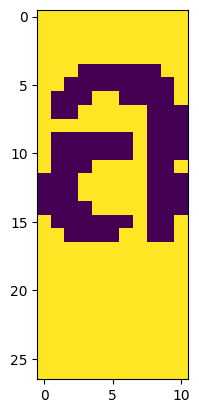

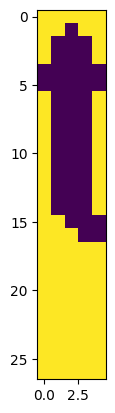

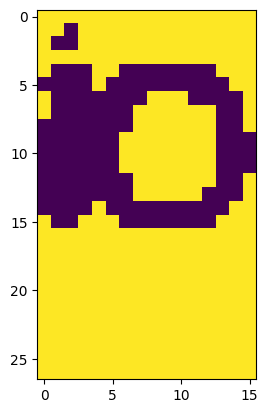

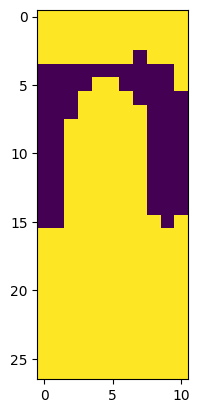

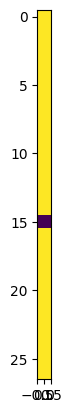

In [630]:
lines[2] = cv2.bitwise_not(lines[2])
# print(img)
plt.imshow(lines[2])
plt.show()

# split text into rows
# find sum of column values, row-wise

# a is row sum
a = np.sum(lines[2], axis=0)
print(a)

alphabet_indices = []
seg = []

for i in range(0,len(a)):
  if a[i] > 0:
    seg.append(i)
  if ((a[i] == 0) & (len(seg) >= 5)):
    alphabet_indices.append(seg)
    seg = []

# at the end of the loop if there is text at the right
if len(seg) > 0:
  alphabet_indices.append(seg)

# number of alphabets segments
print("Number of alphabets detected : ")
print(len(alphabet_indices))

print(alphabet_indices)

lines[2] = cv2.bitwise_not(lines[2])

words = []

for i in range(0,len(alphabet_indices)):
  words.append(lines[2][:,alphabet_indices[i]])
  plt.imshow(lines[2][:,alphabet_indices[i]])
  plt.show()

In [631]:
words = []

for line in lines:
  line = cv2.bitwise_not(line)
  a = np.sum(line, axis=0)
  alphabet_indices = []
  seg = []

  for i in range(0,len(a)):
    if a[i] > 0:
      seg.append(i)
    if ((a[i] == 0) & (len(seg) >= 5)):
      alphabet_indices.append(seg)
      seg = []

  # at the end of the loop if there is text at the right
  if len(seg) > 0:
    alphabet_indices.append(seg)

  line = cv2.bitwise_not(line)


  for i in range(0,len(alphabet_indices)):
    words.append(line[:,alphabet_indices[i]])
    # plt.imshow(line[:,alphabet_indices[i]])
    # plt.show()

# print(words)

In [632]:
# print(len(words))

# for word in words:
#   plt.imshow(word)
#   plt.show()

In [633]:
import os
import shutil
save_dir = 'words'
os.makedirs(save_dir, exist_ok=True)

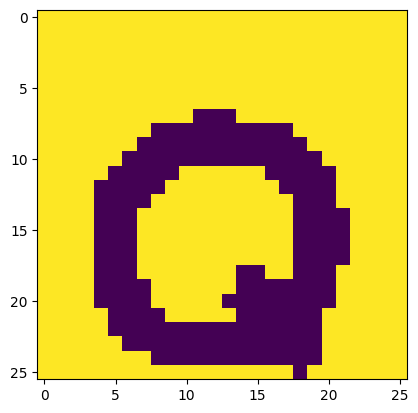

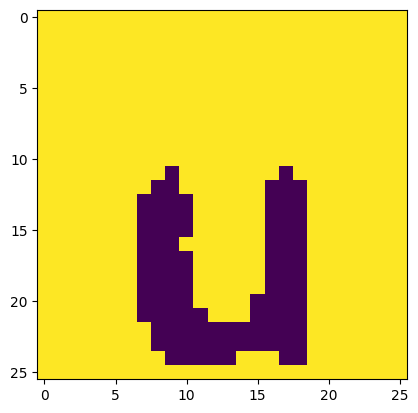

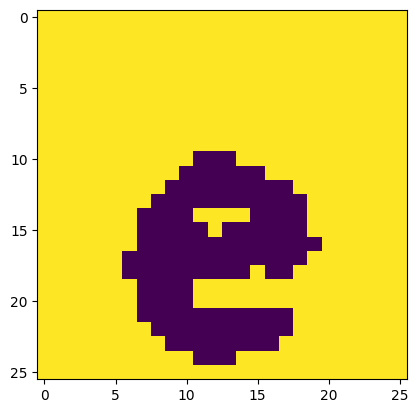

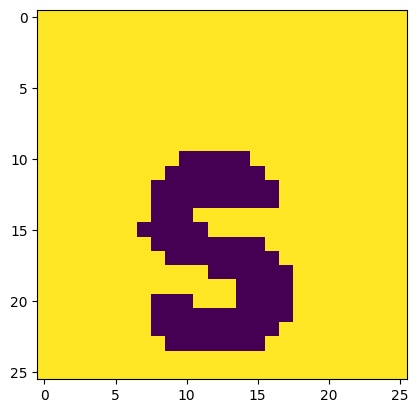

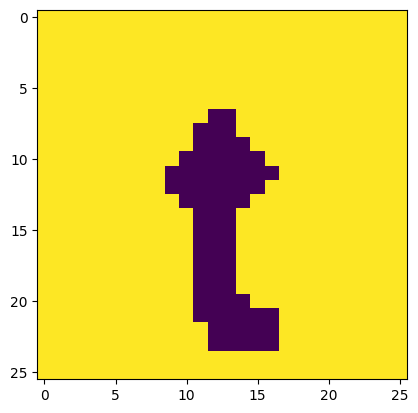

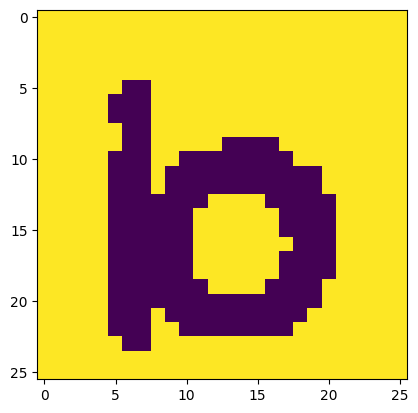

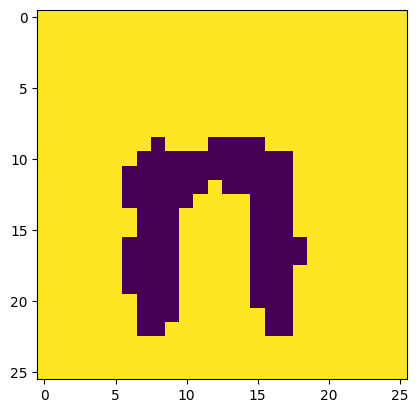

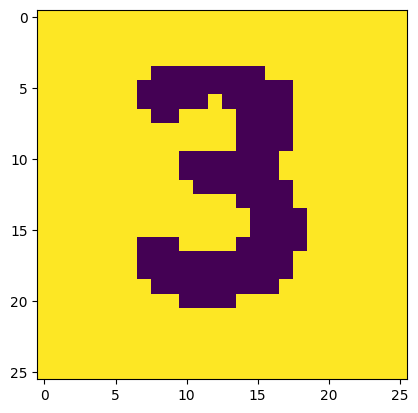

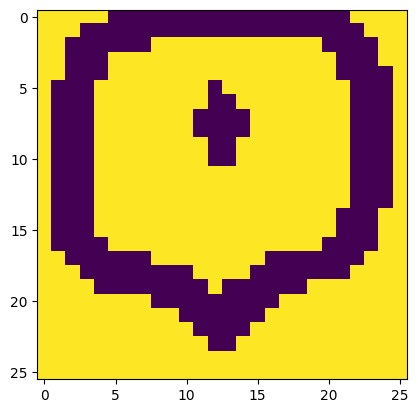

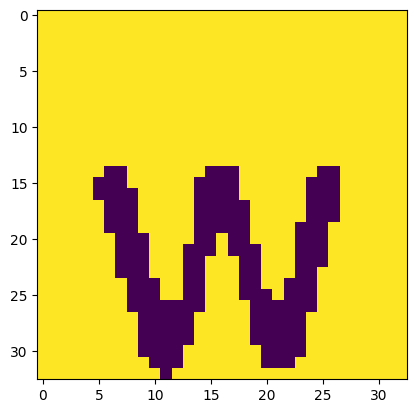

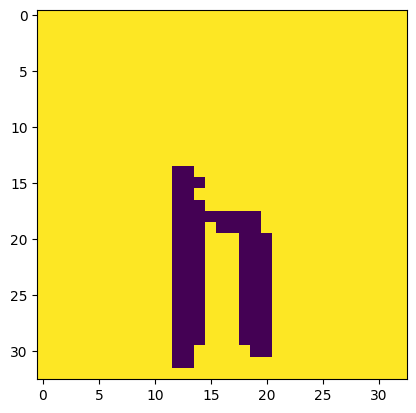

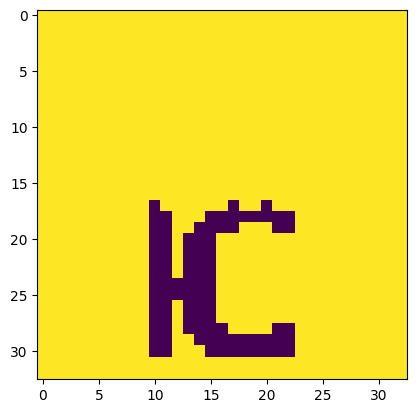

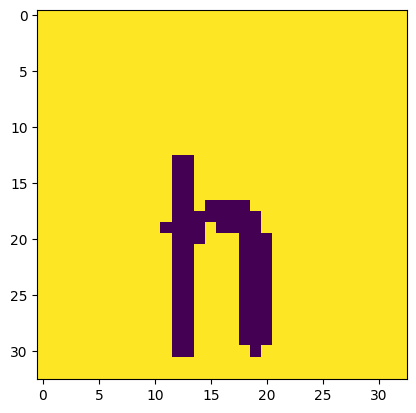

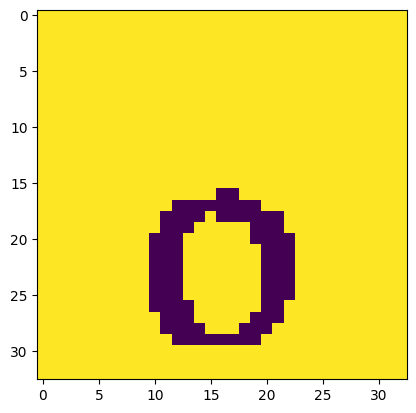

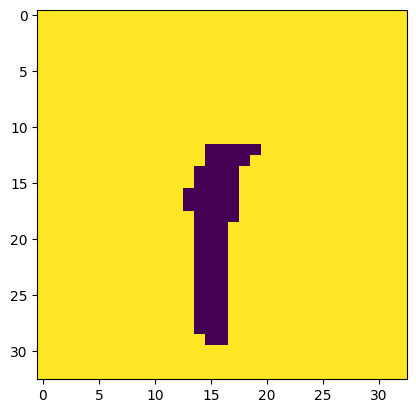

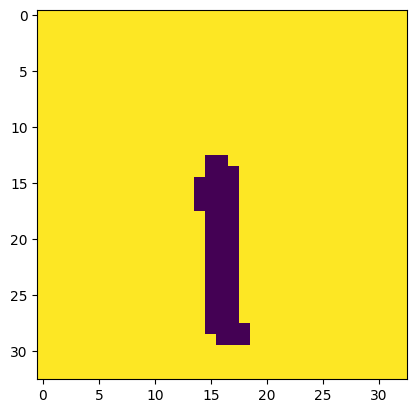

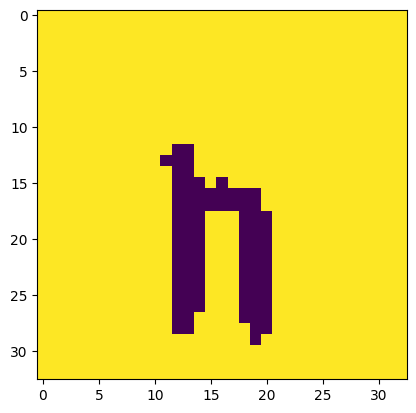

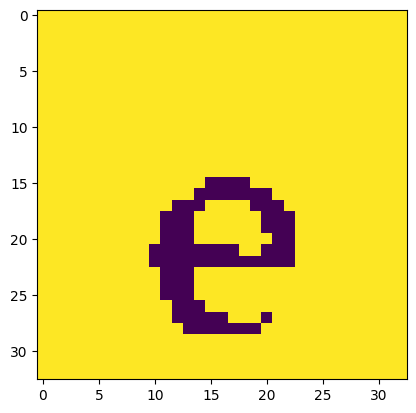

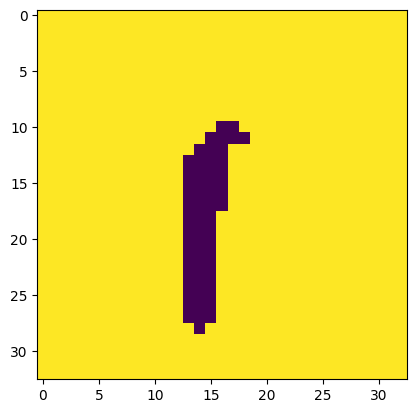

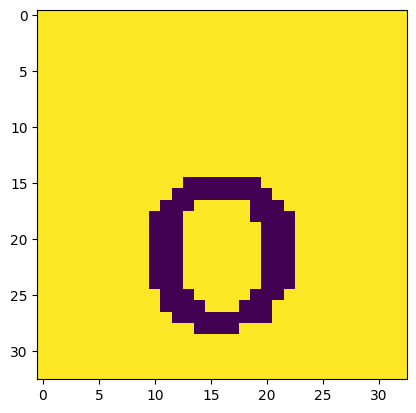

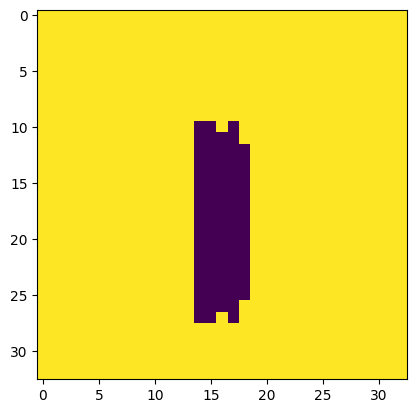

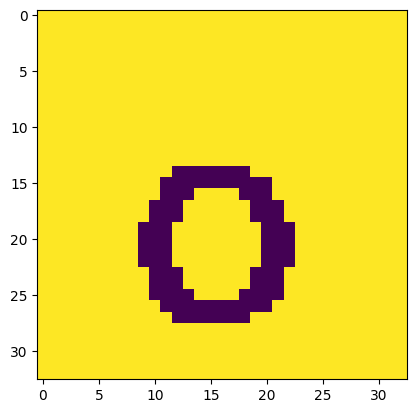

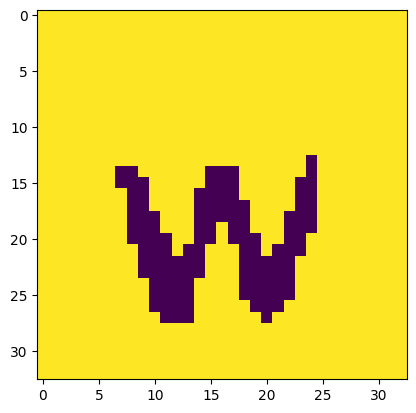

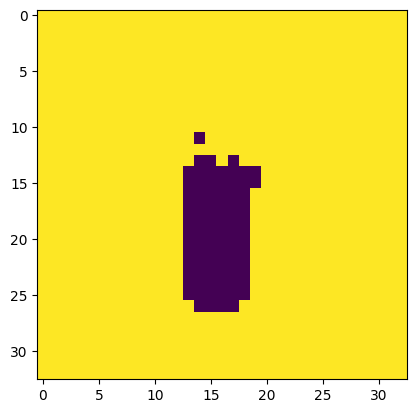

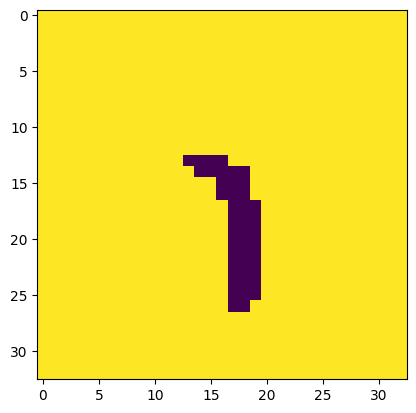

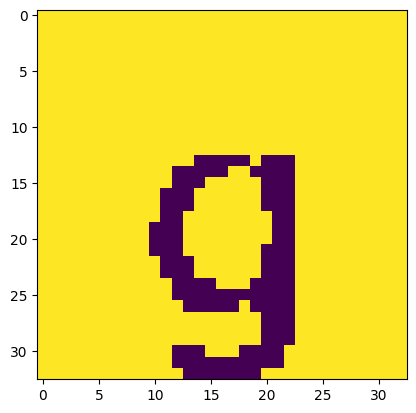

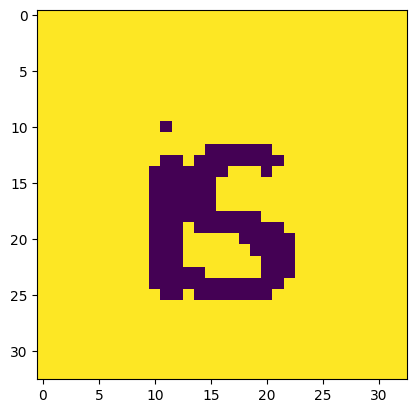

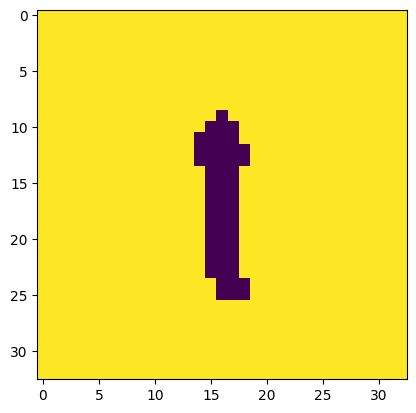

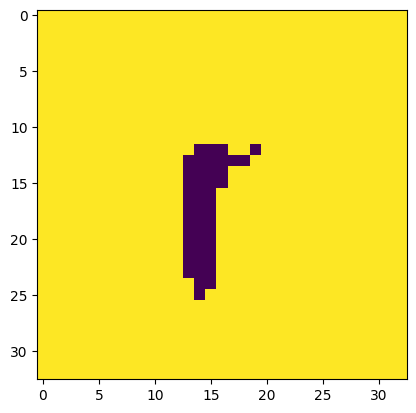

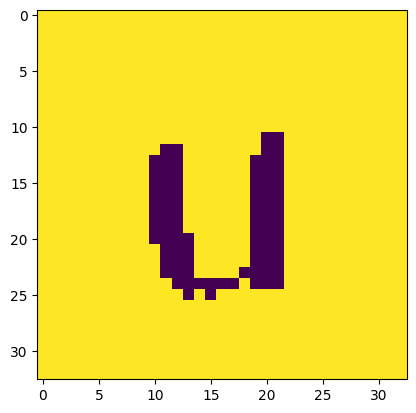

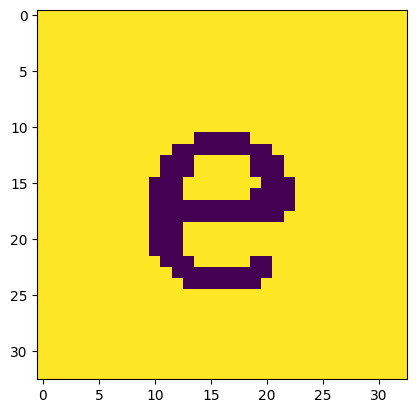

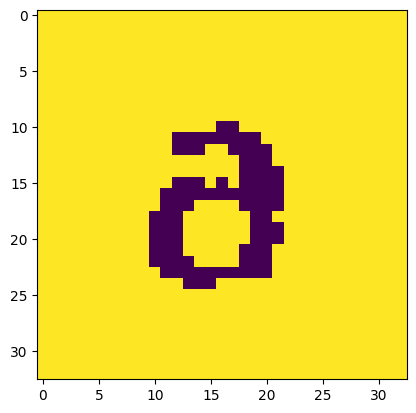

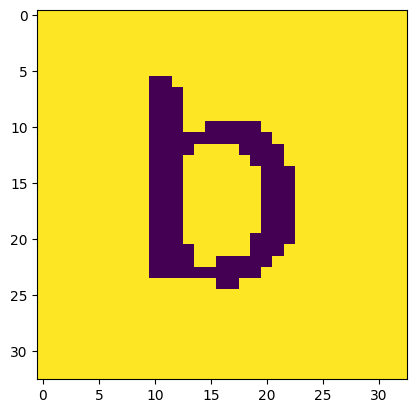

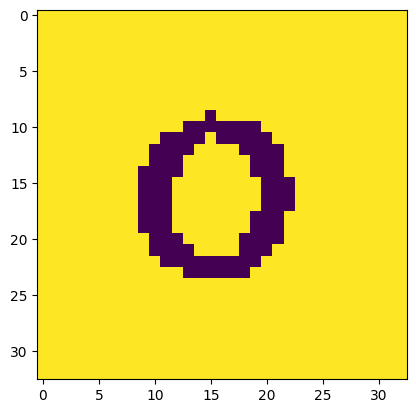

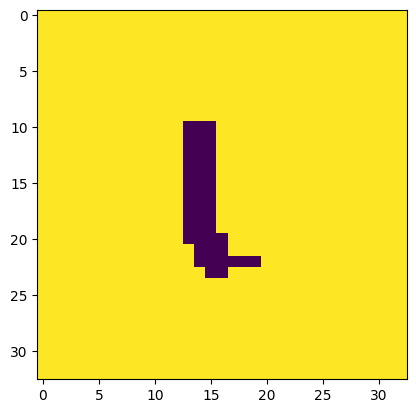

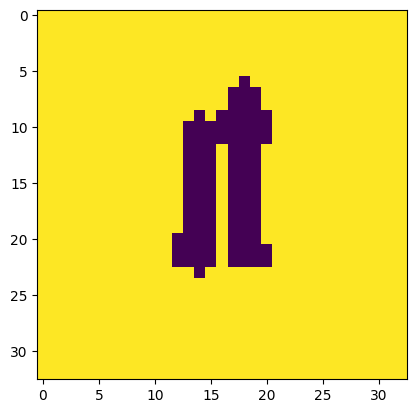

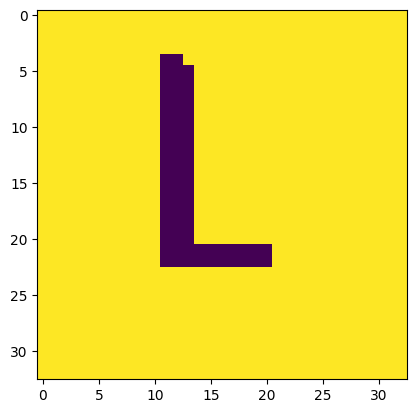

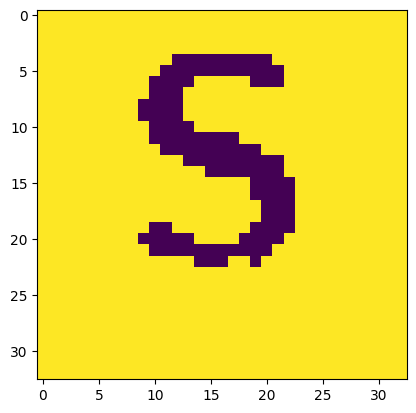

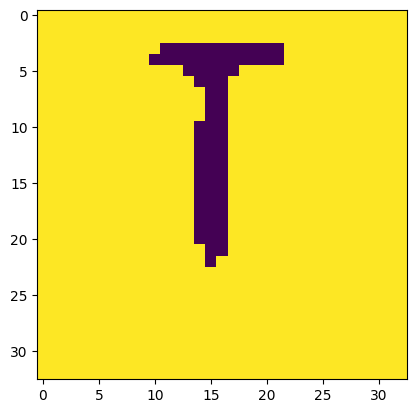

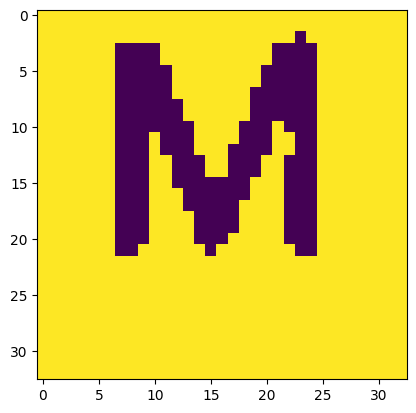

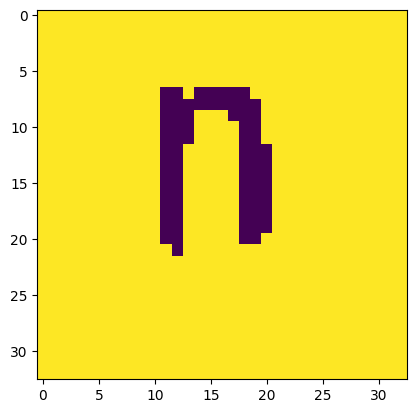

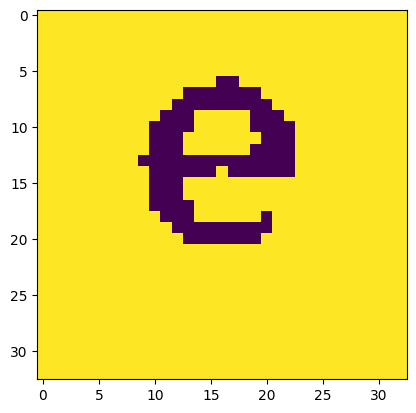

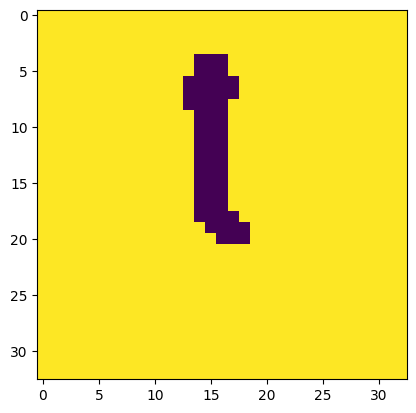

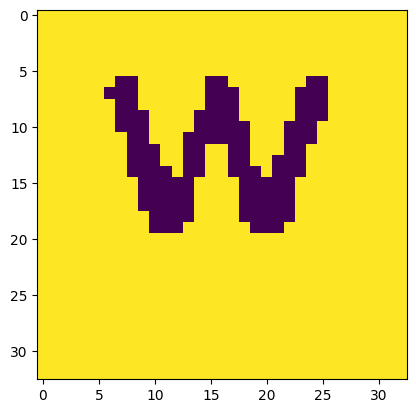

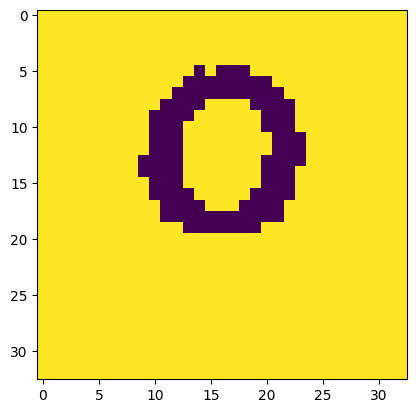

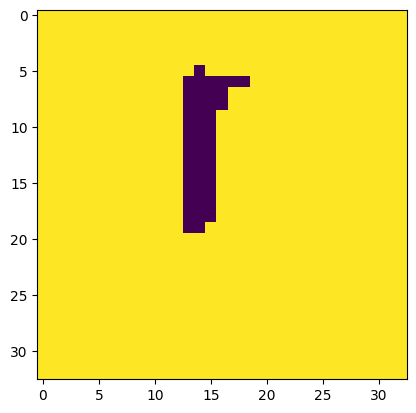

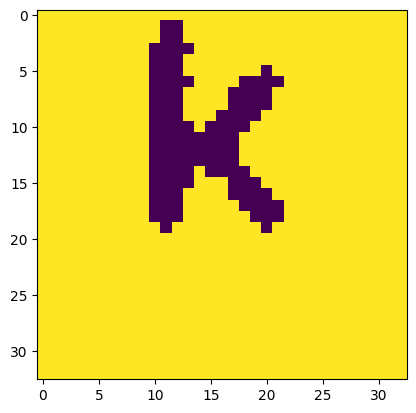

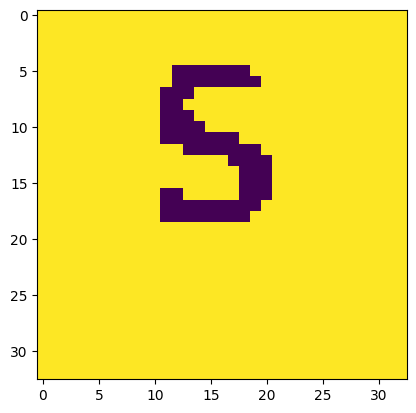

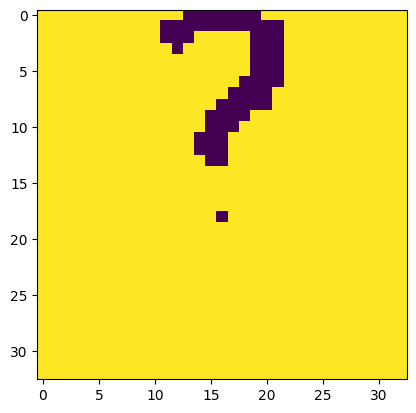

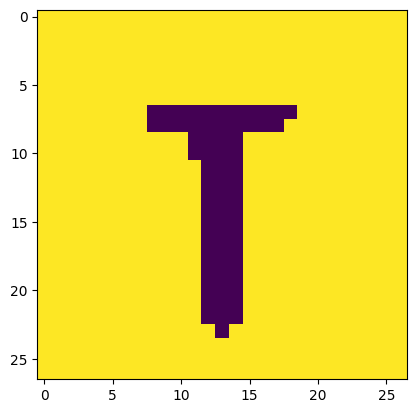

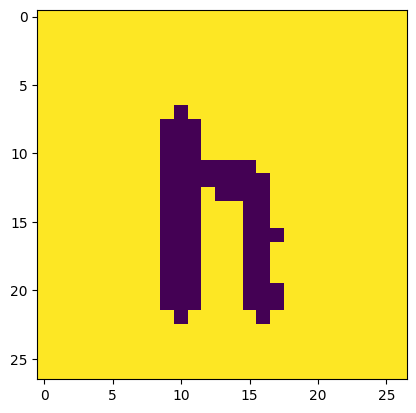

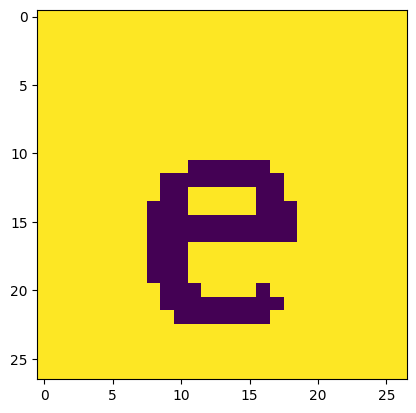

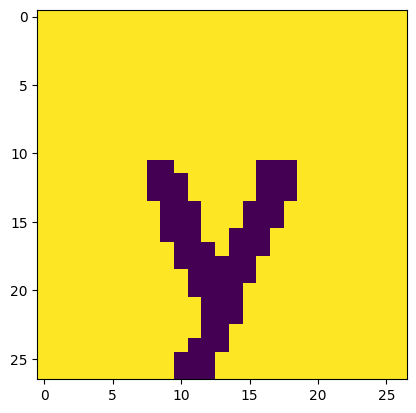

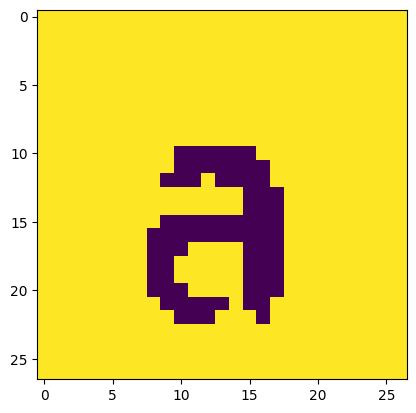

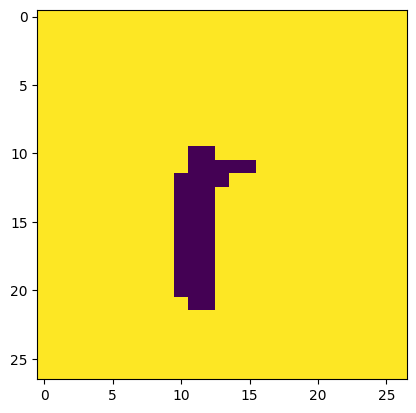

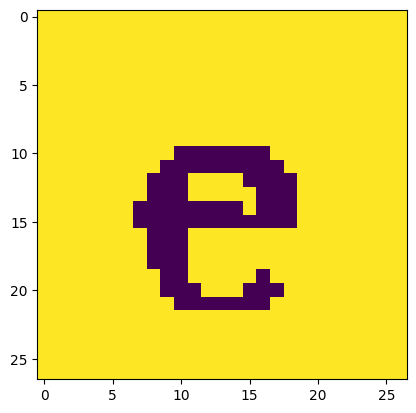

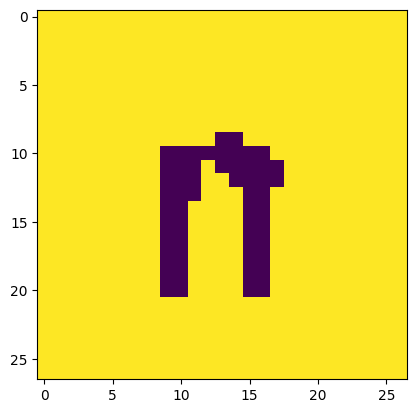

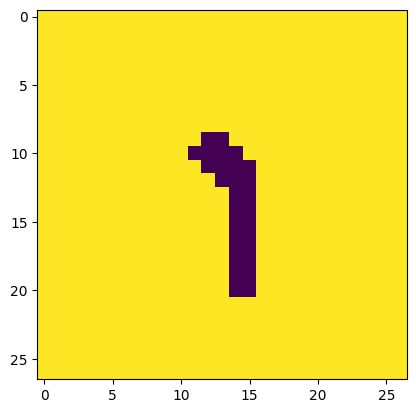

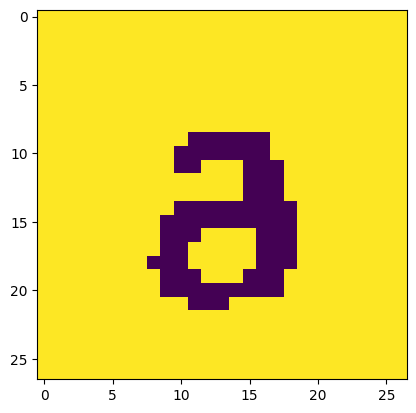

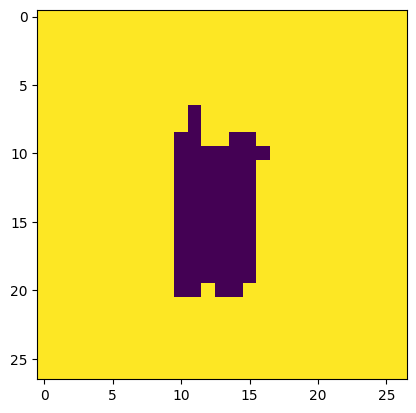

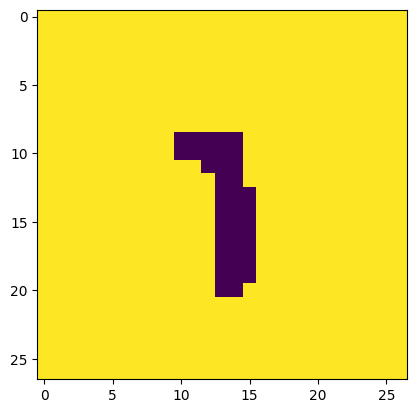

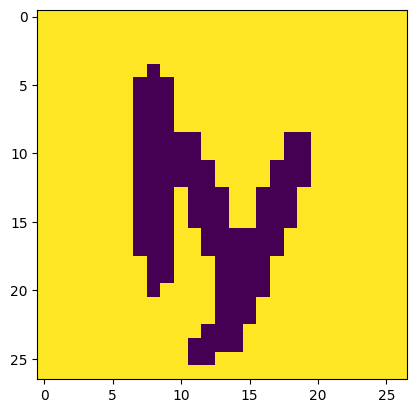

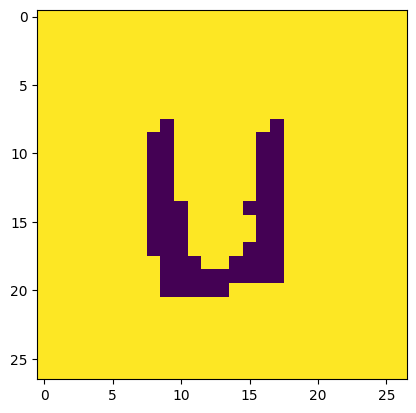

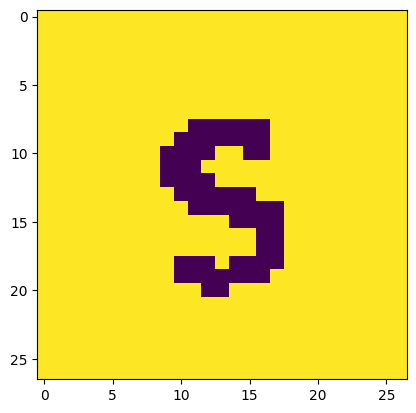

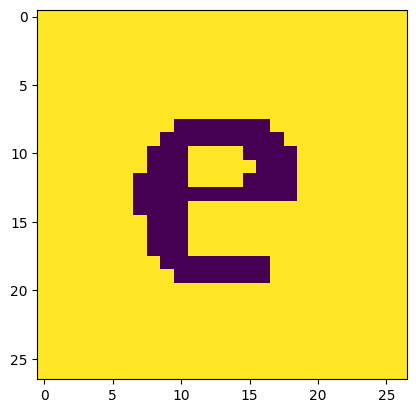

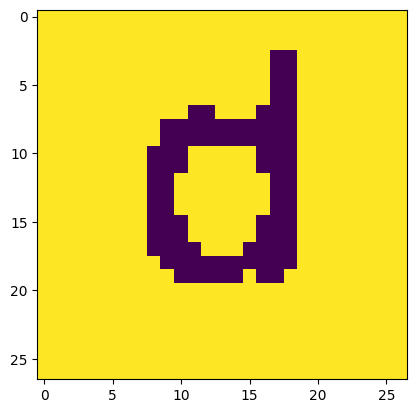

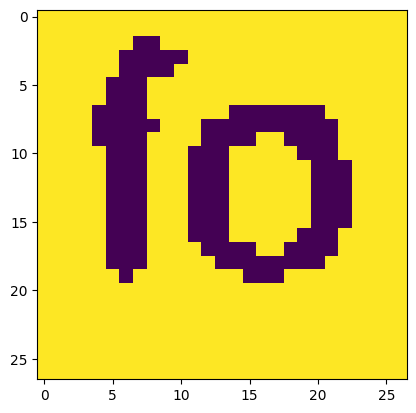

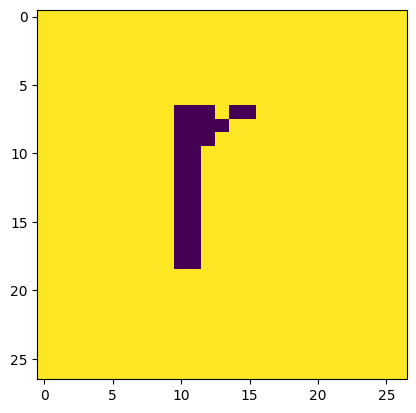

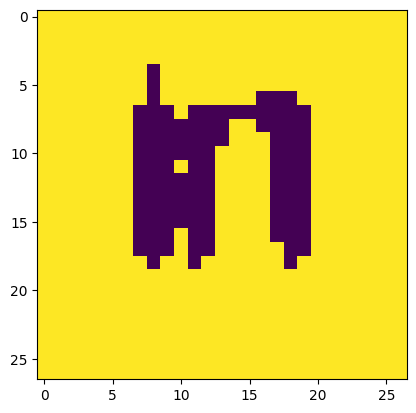

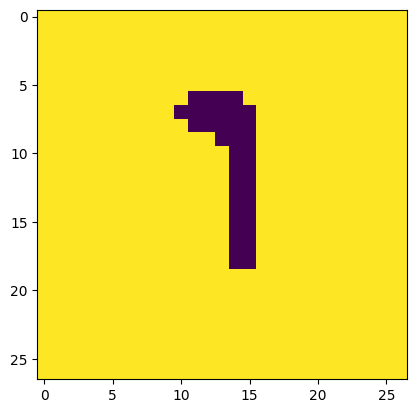

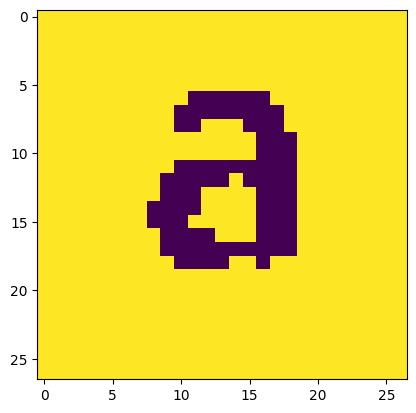

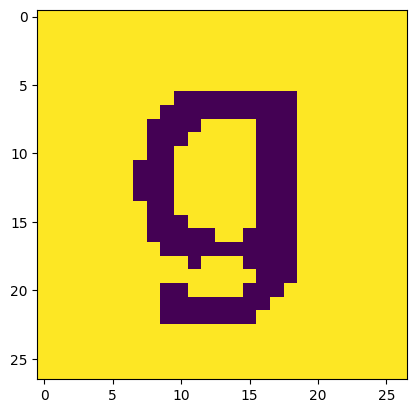

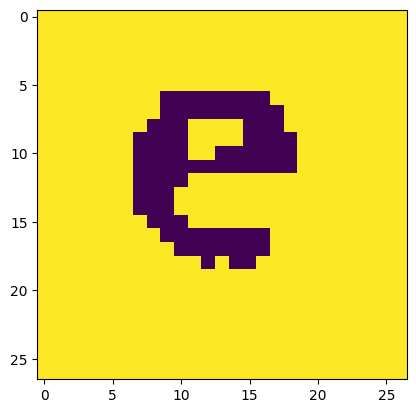

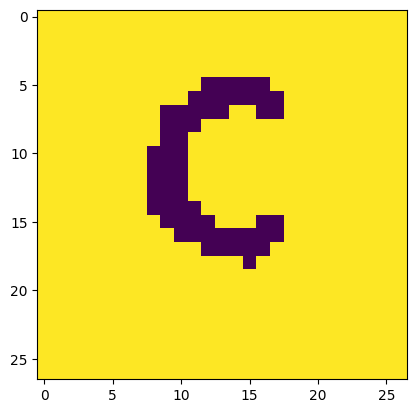

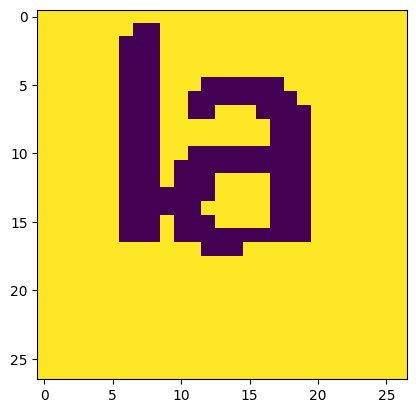

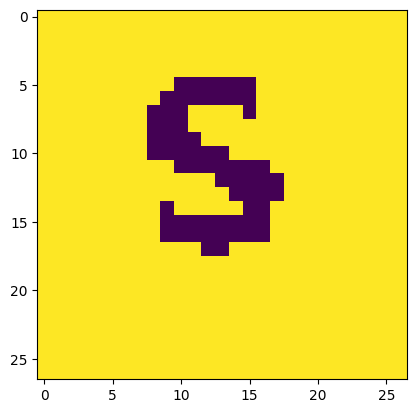

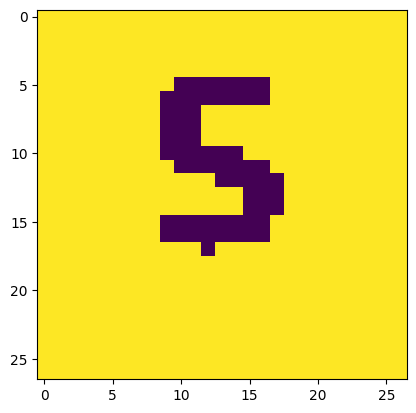

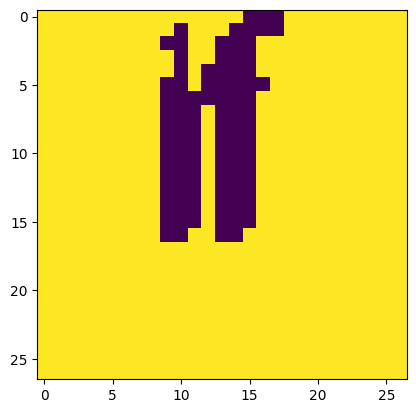

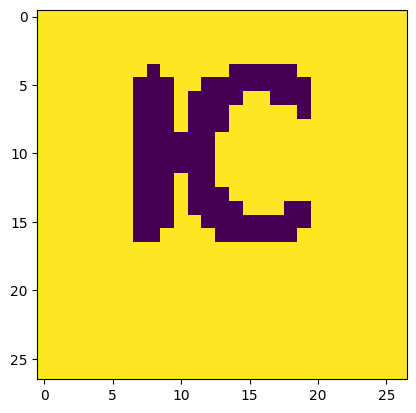

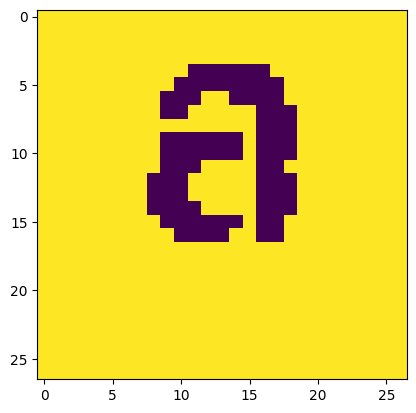

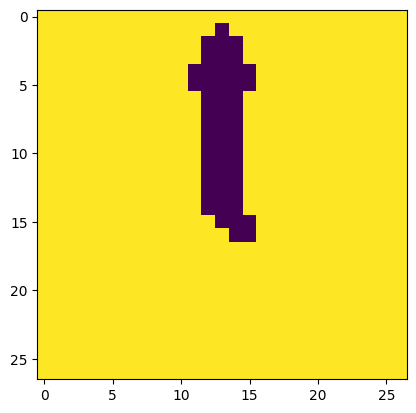

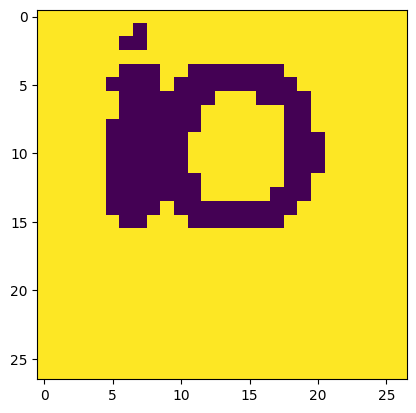

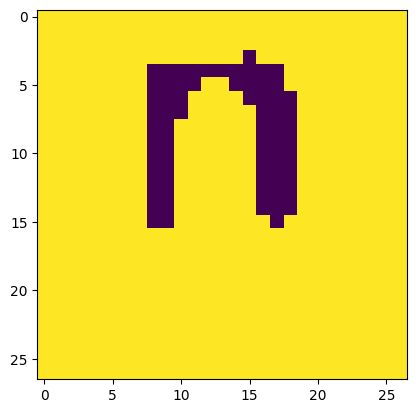

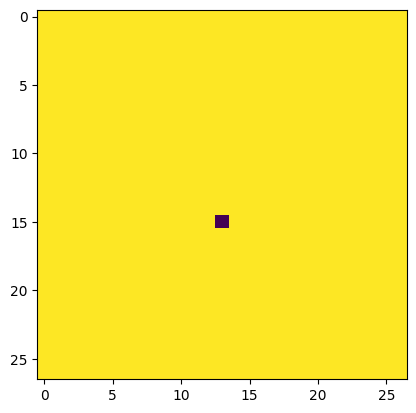

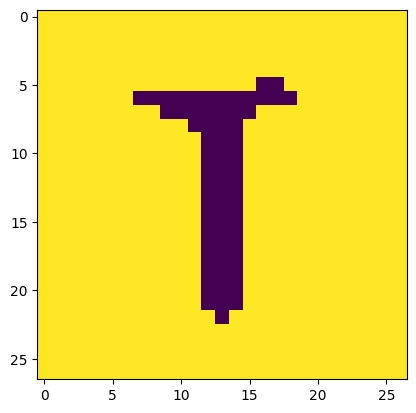

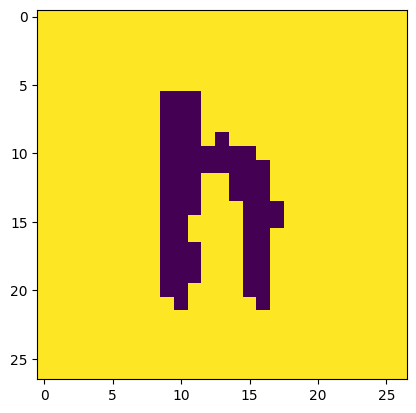

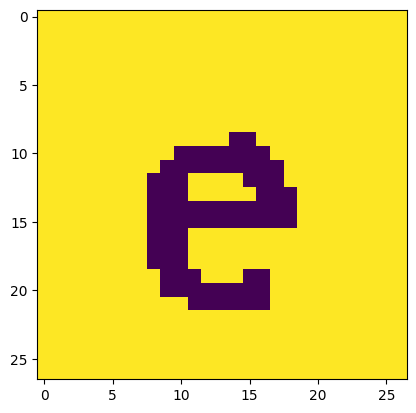

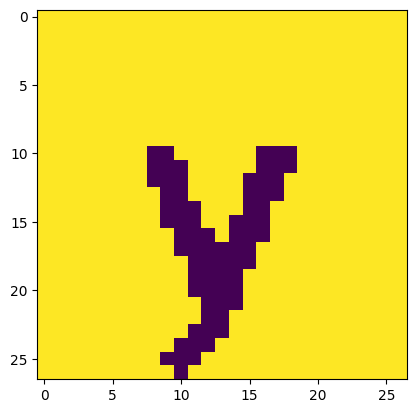

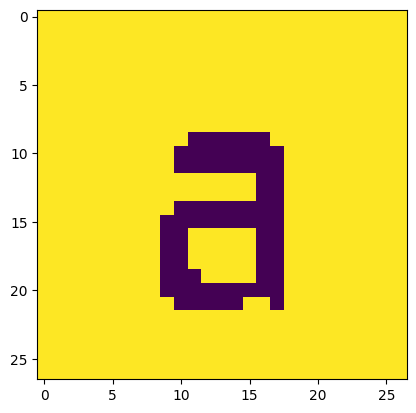

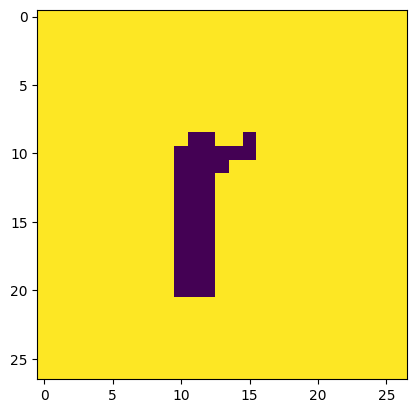

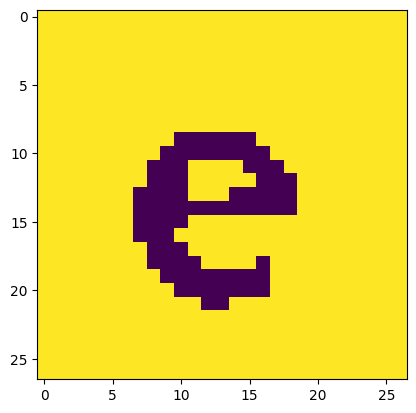

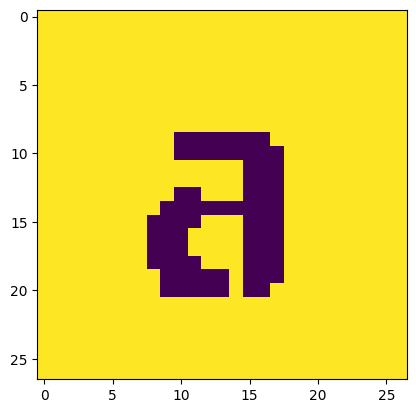

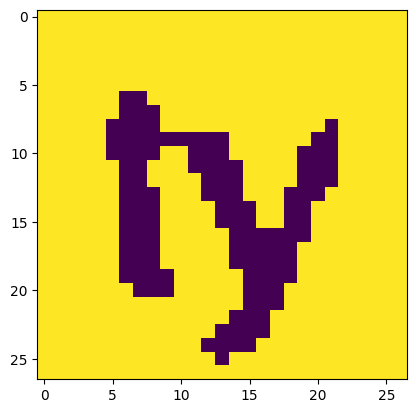

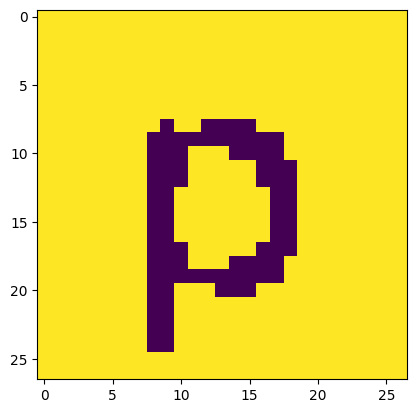

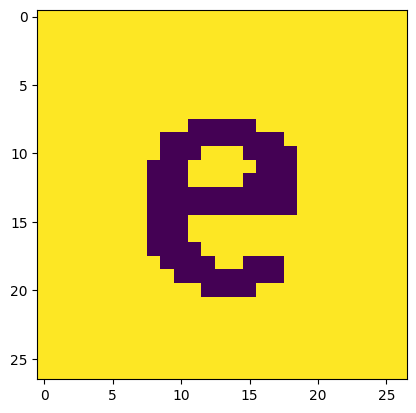

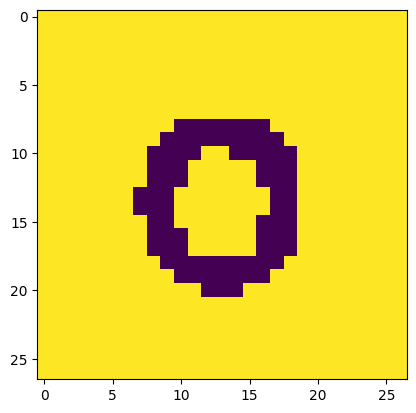

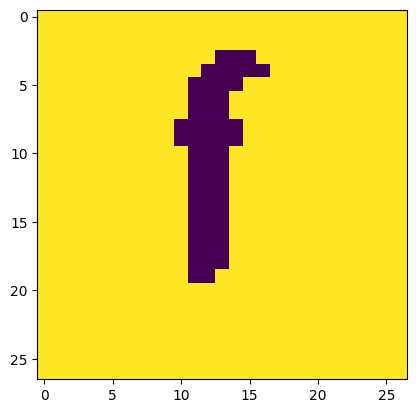

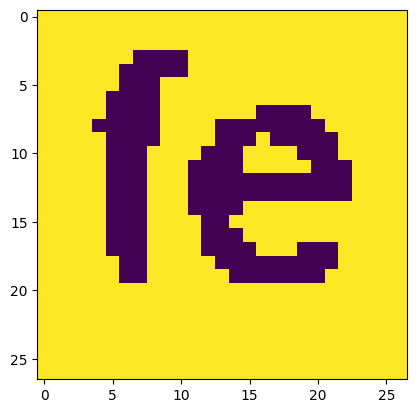

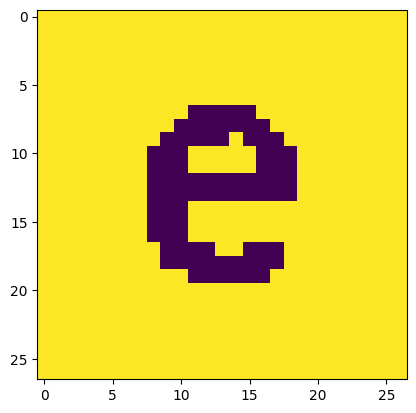

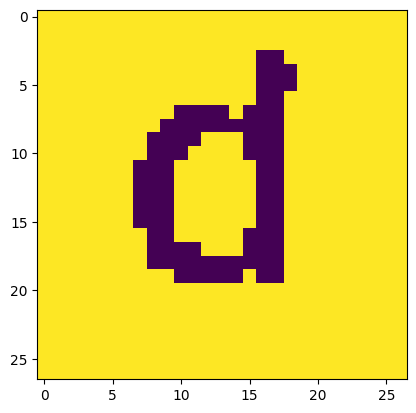

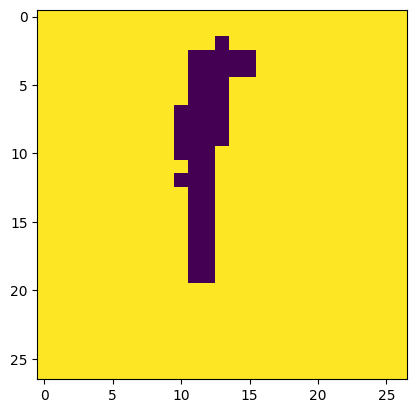

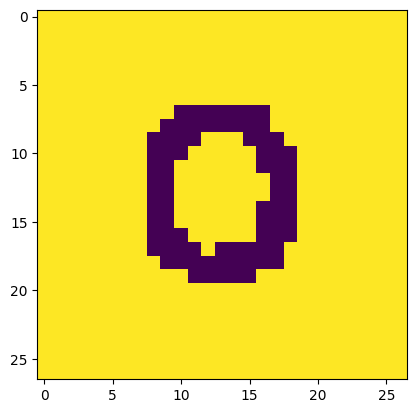

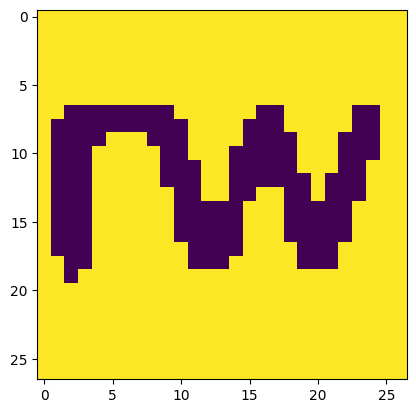

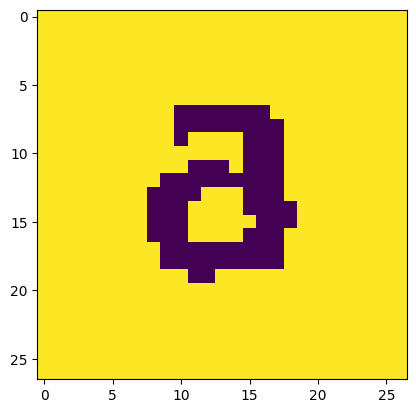

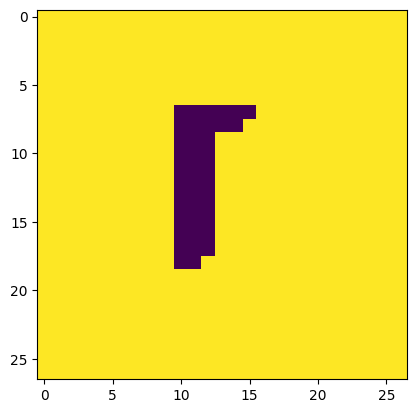

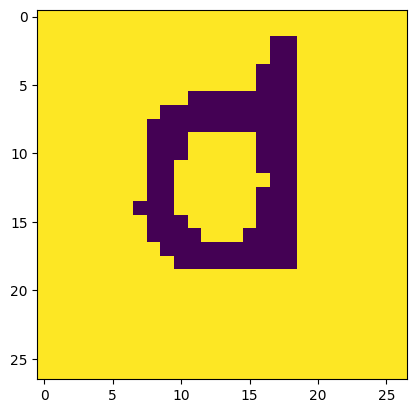

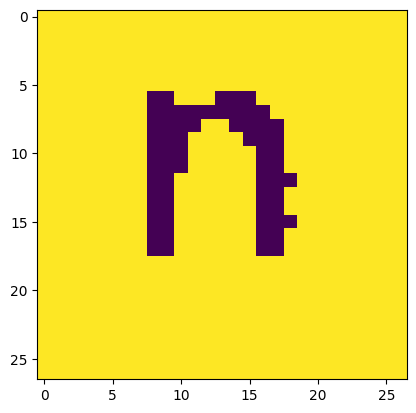

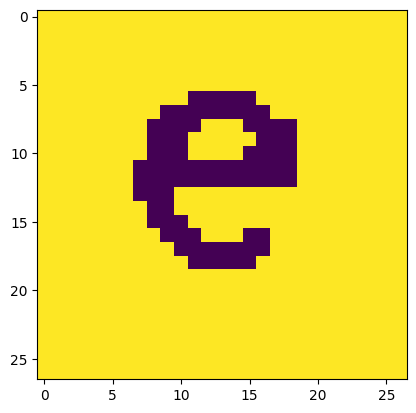

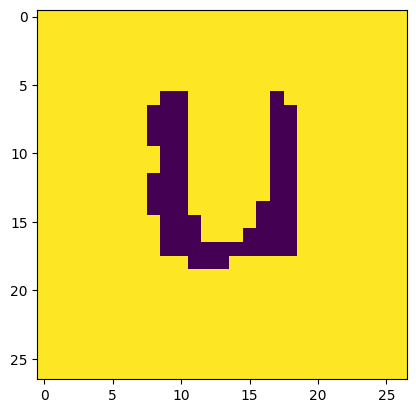

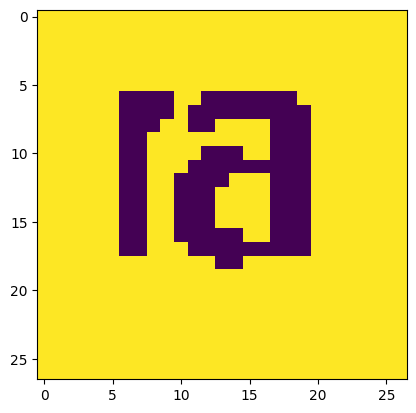

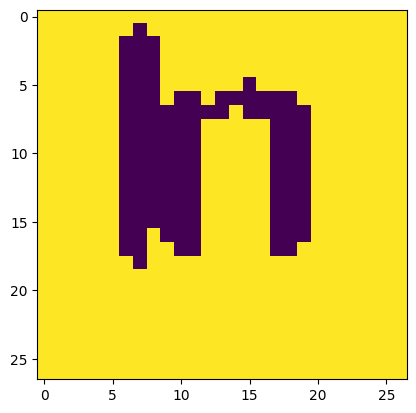

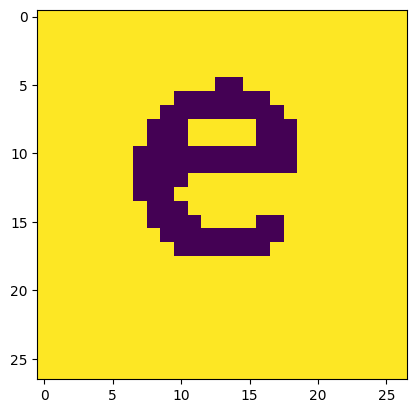

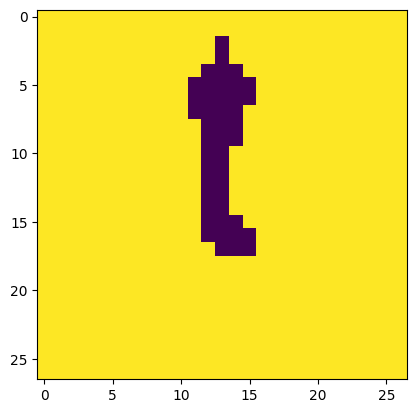

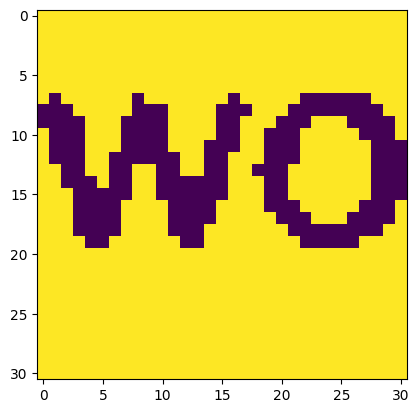

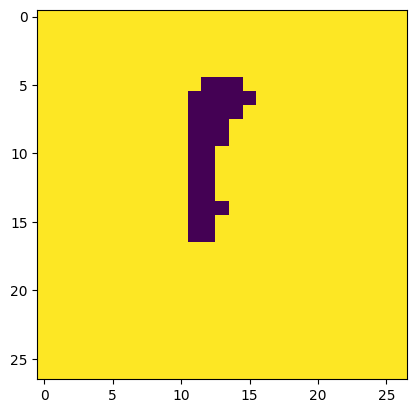

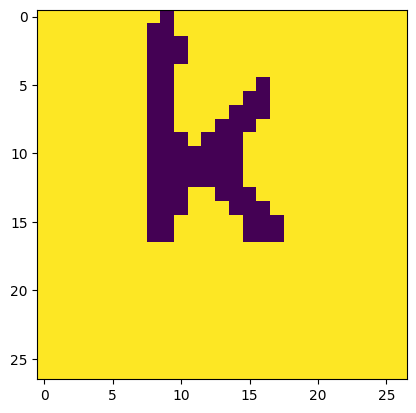

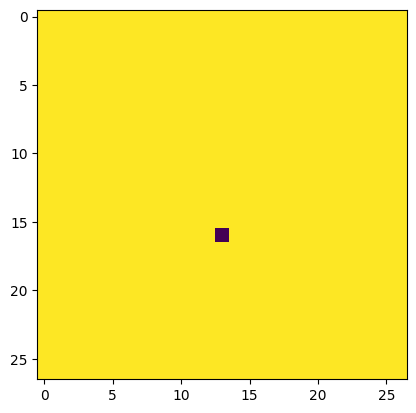

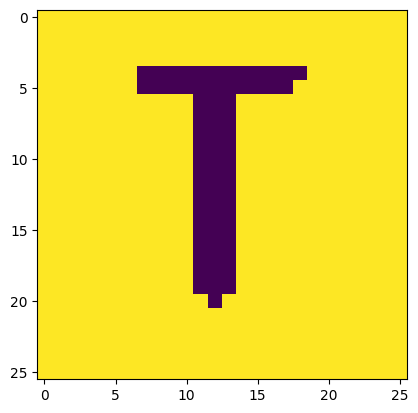

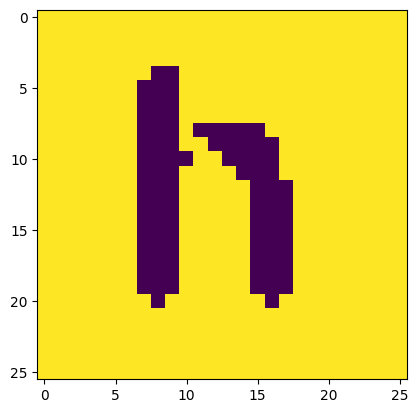

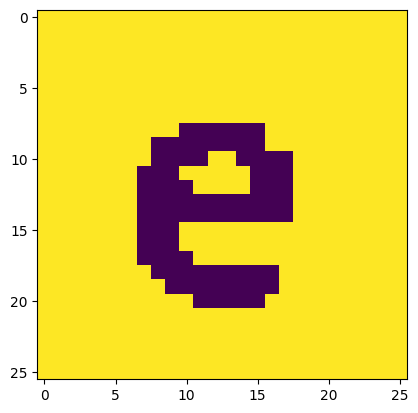

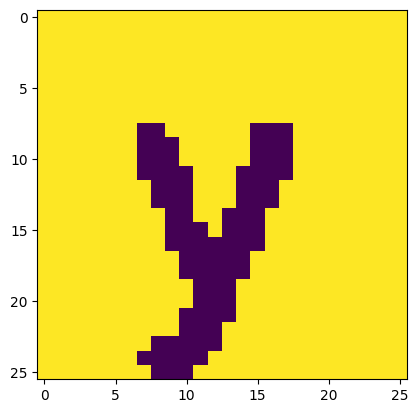

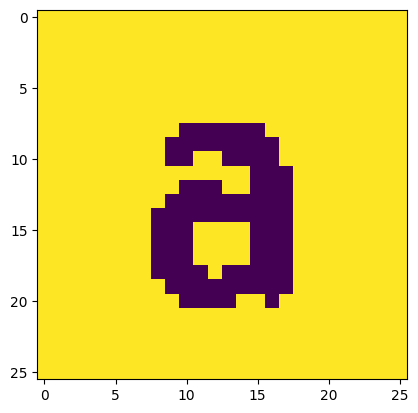

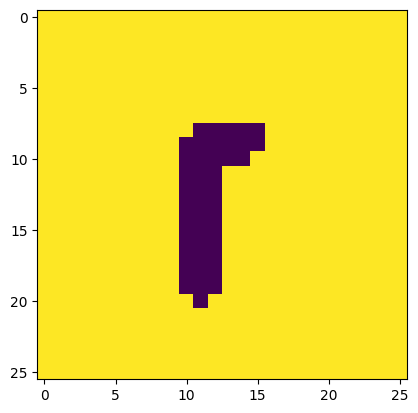

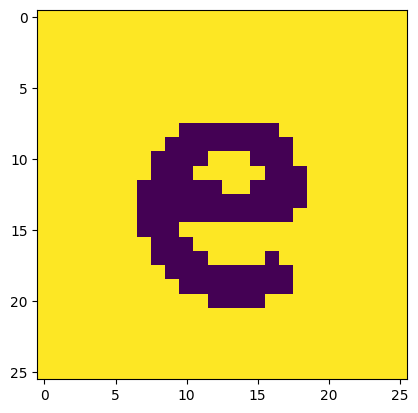

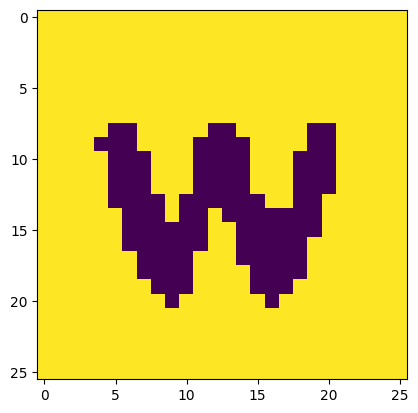

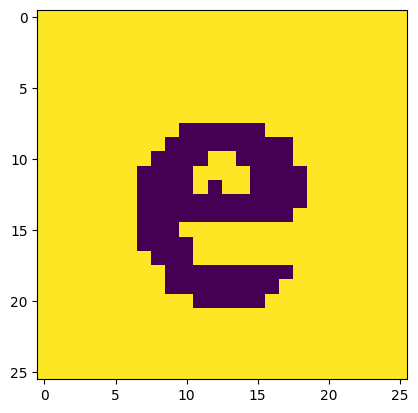

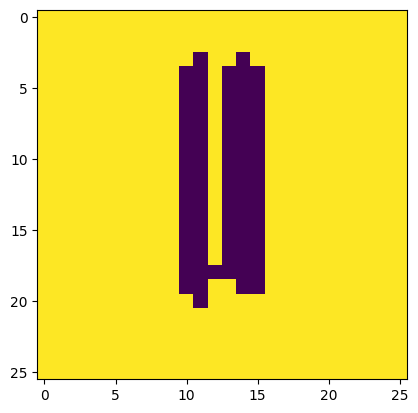

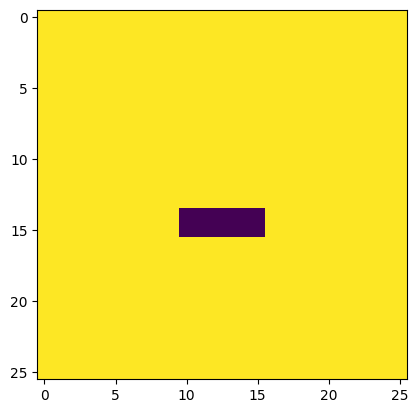

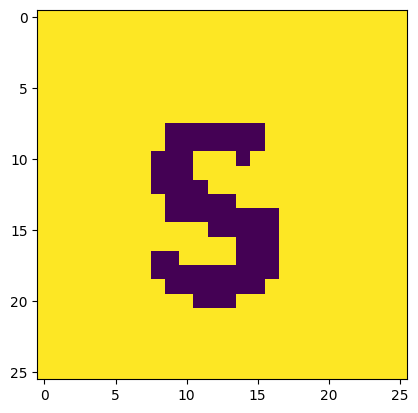

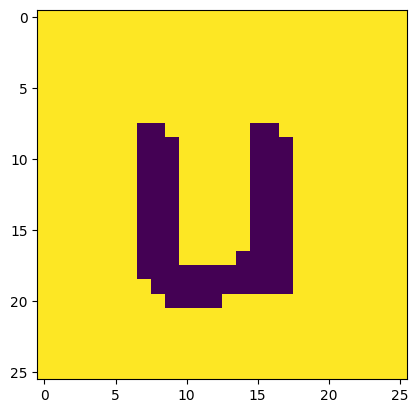

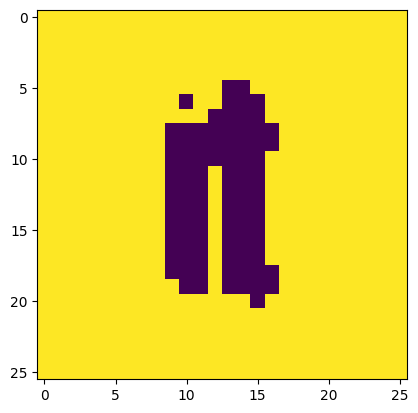

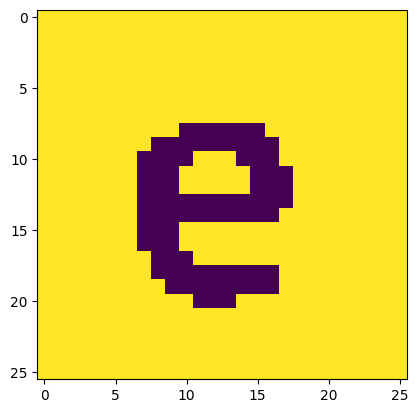

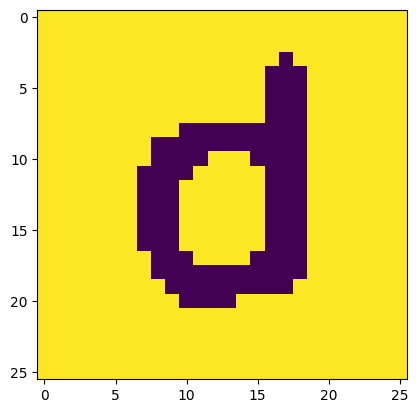

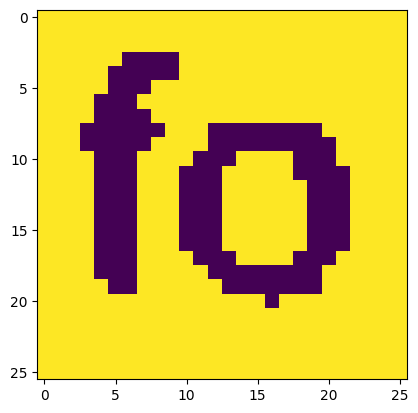

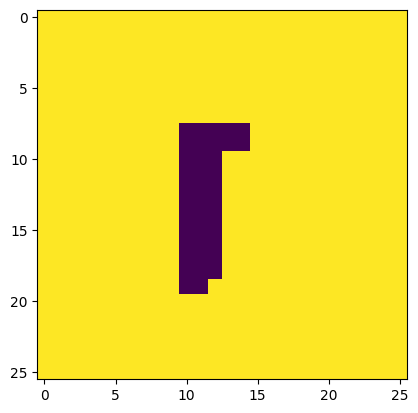

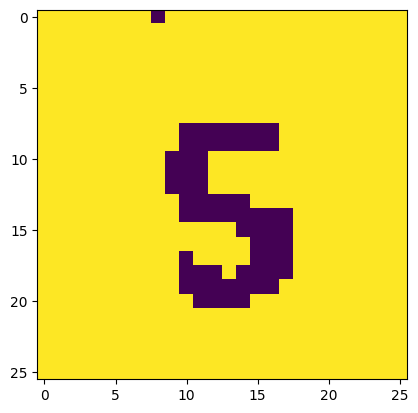

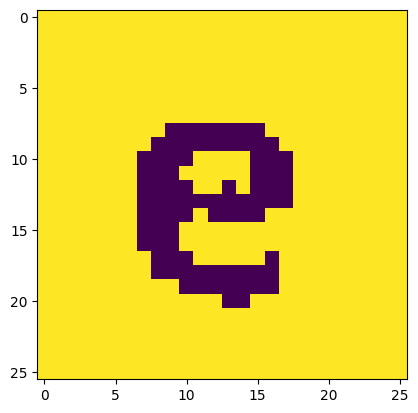

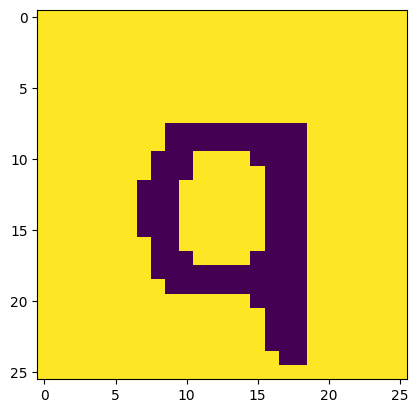

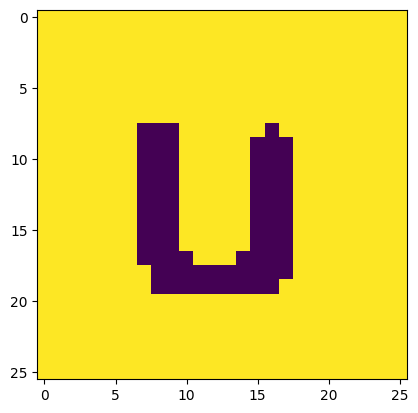

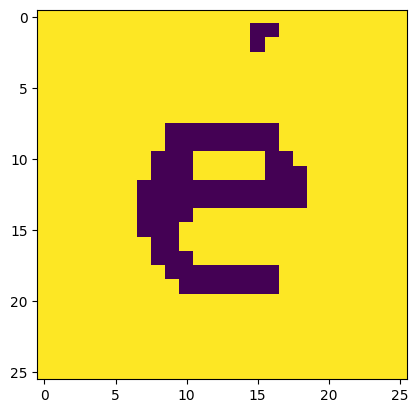

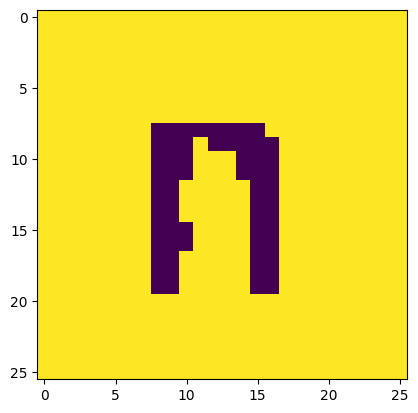

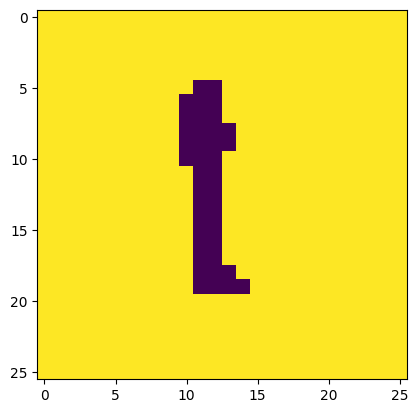

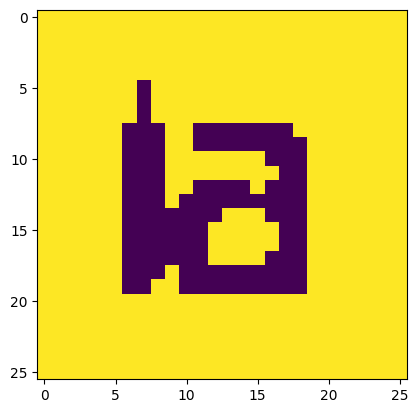

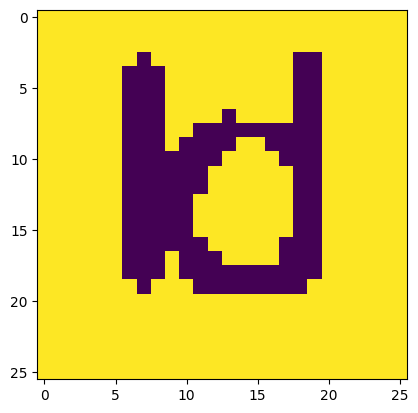

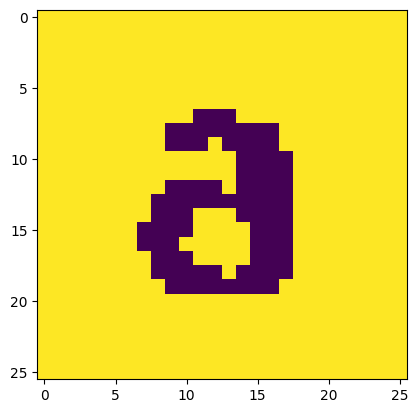

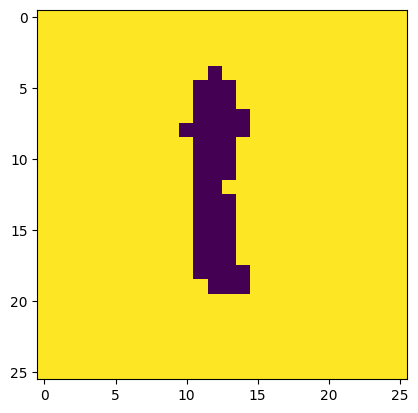

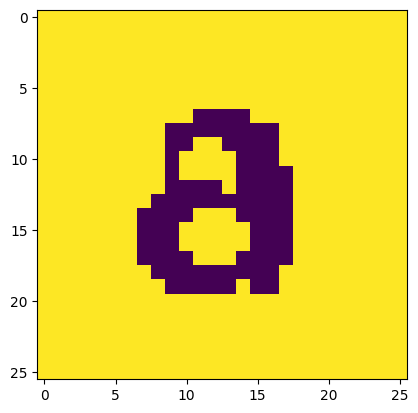

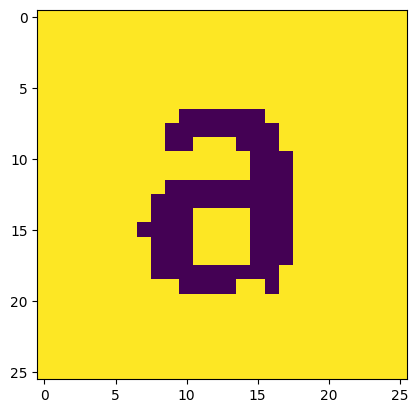

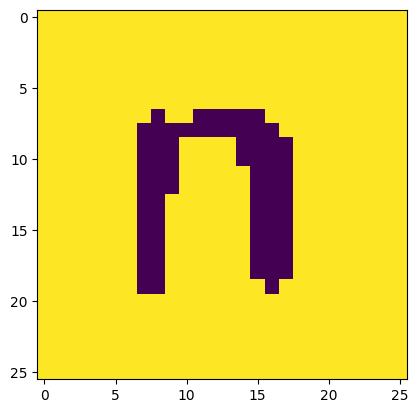

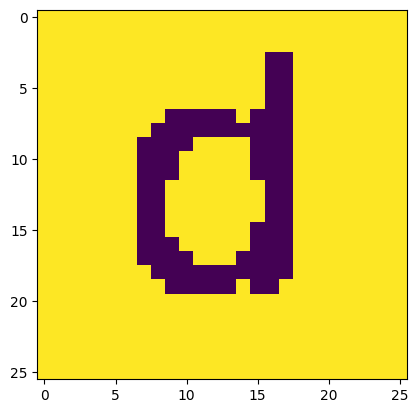

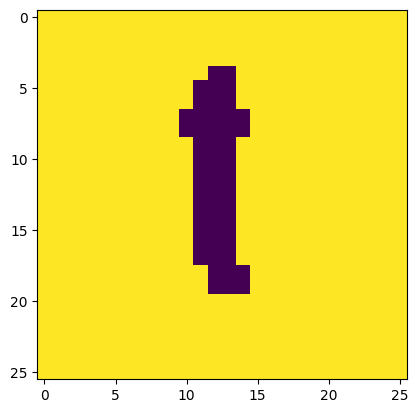

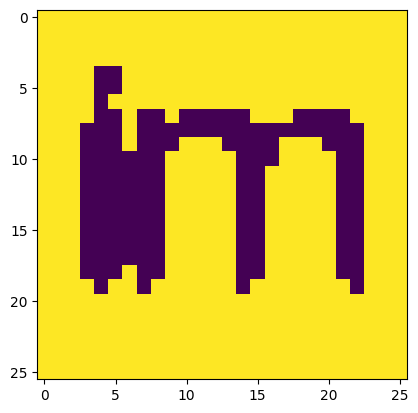

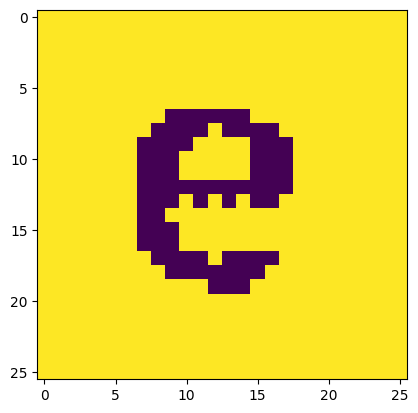

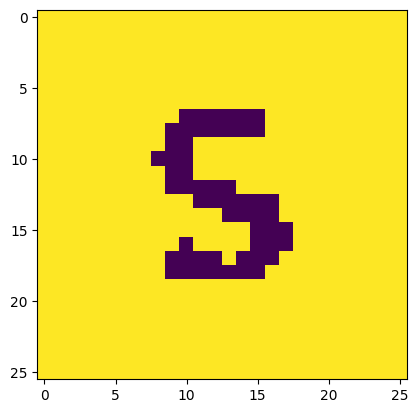

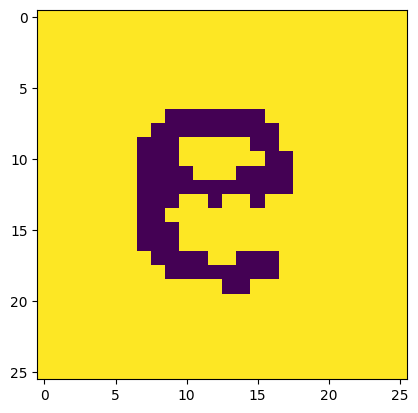

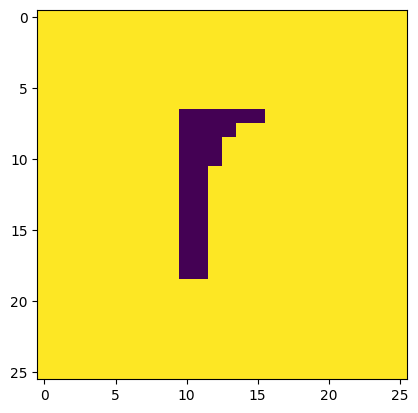

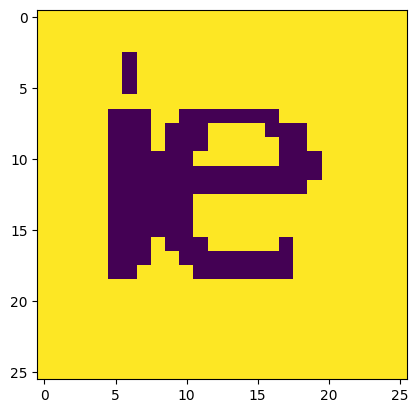

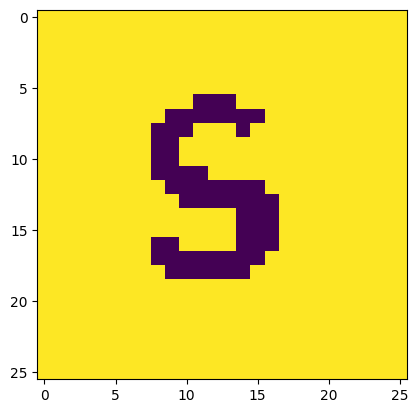

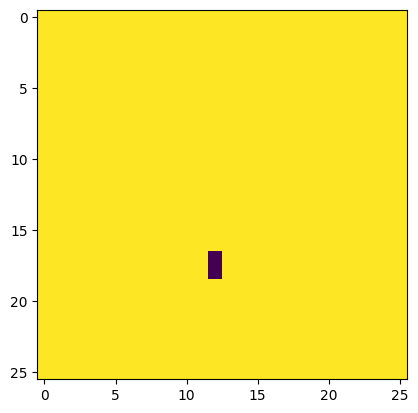

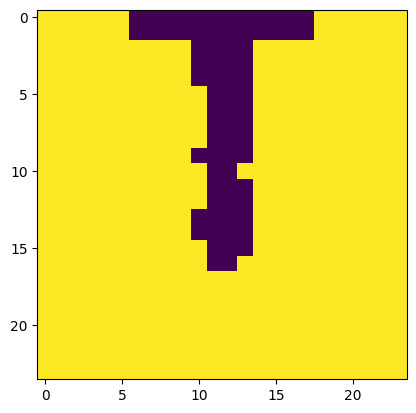

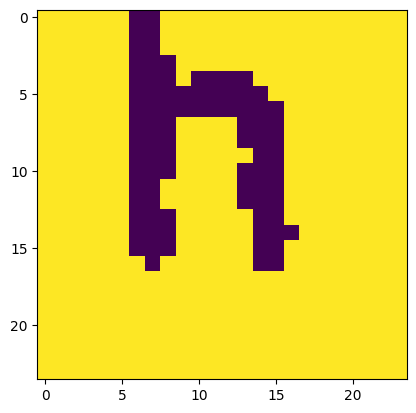

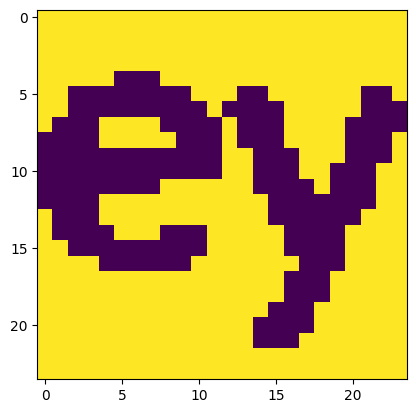

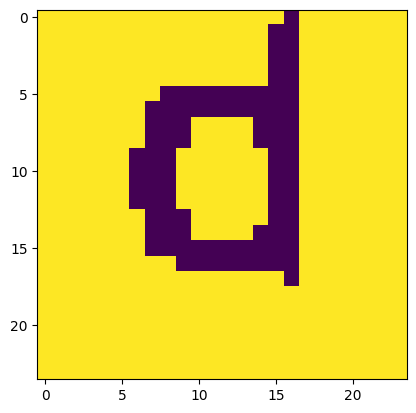

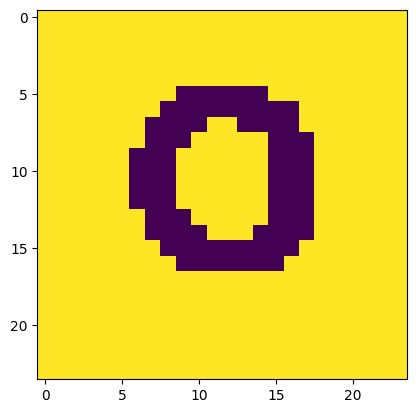

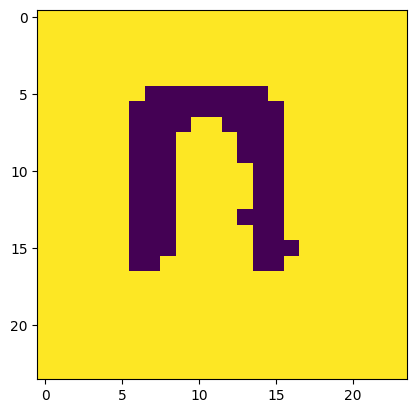

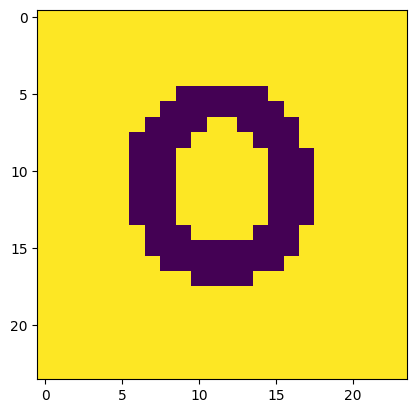

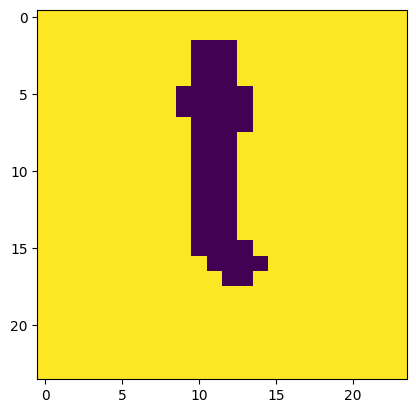

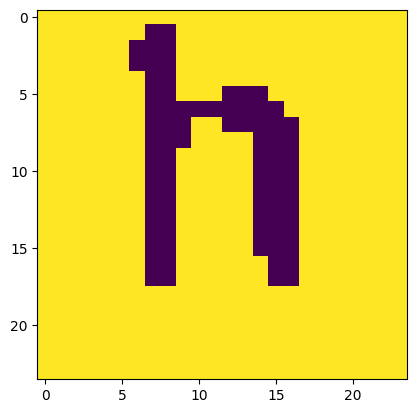

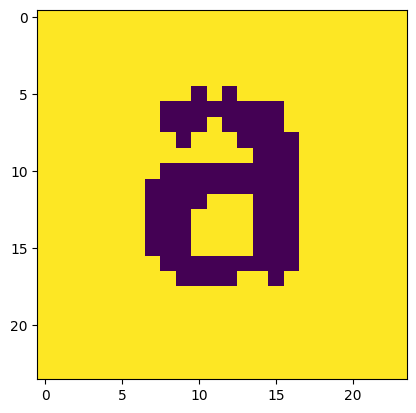

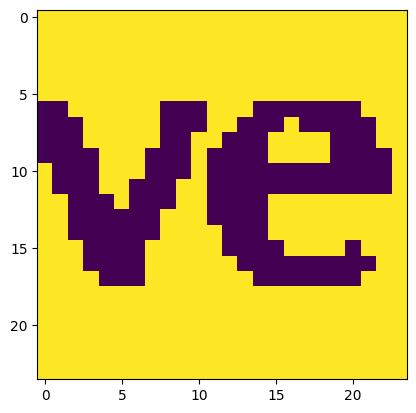

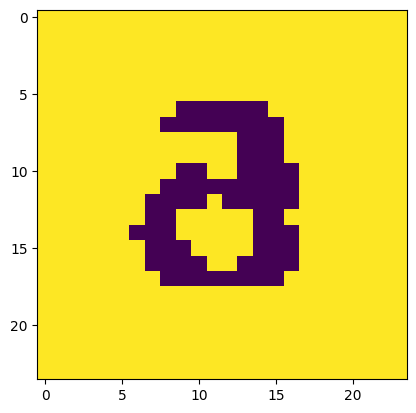

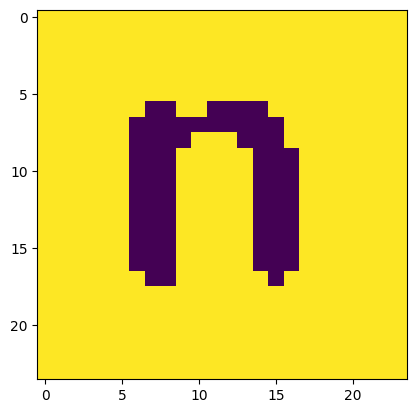

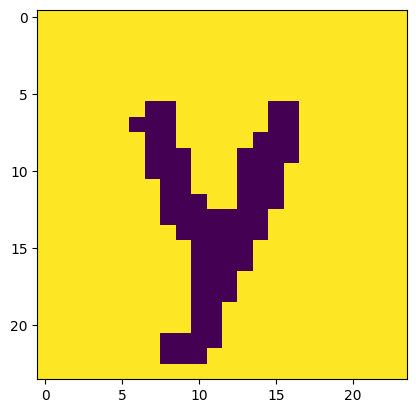

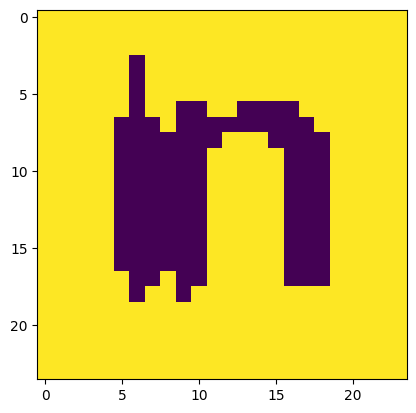

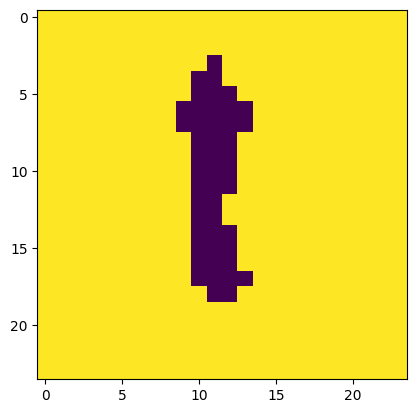

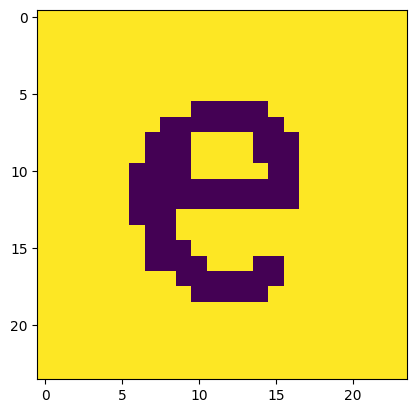

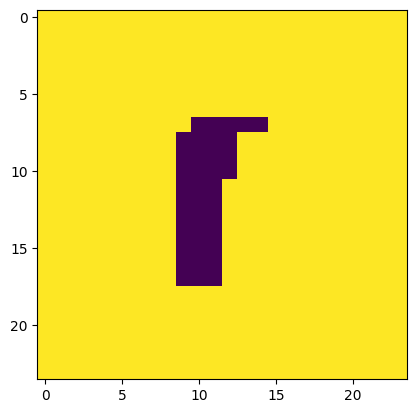

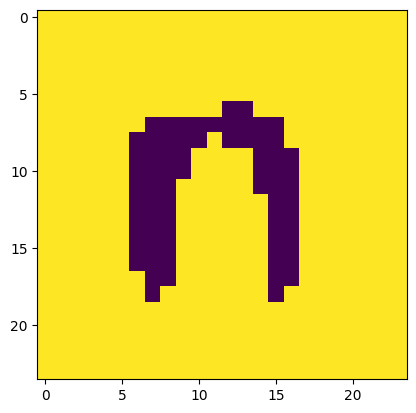

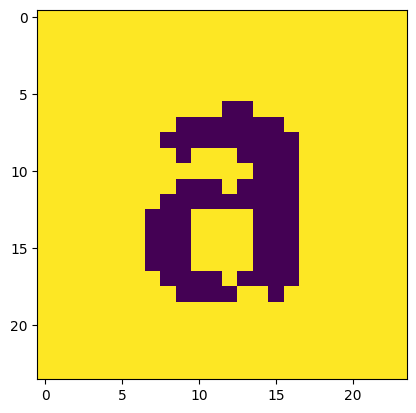

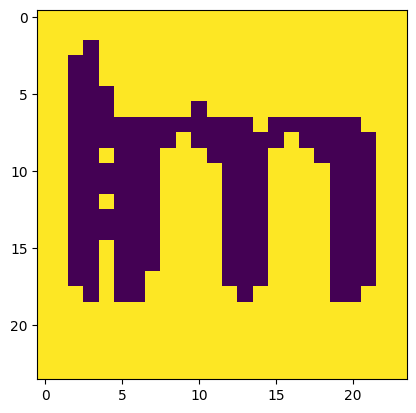

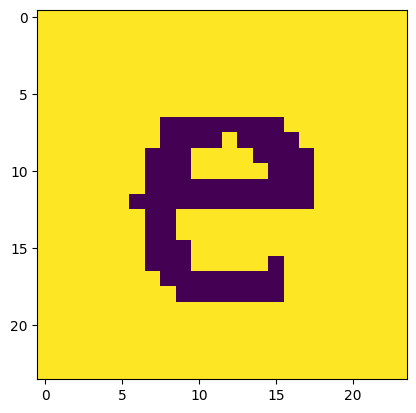

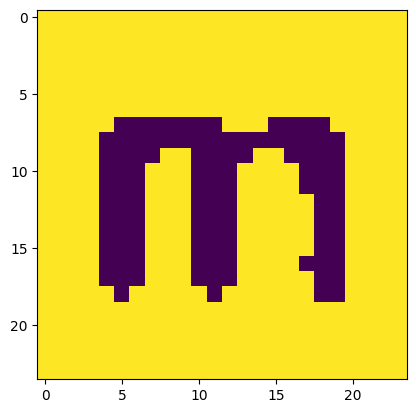

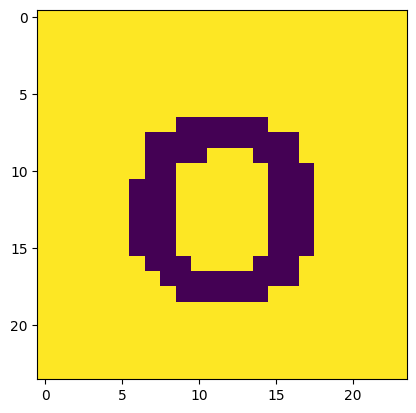

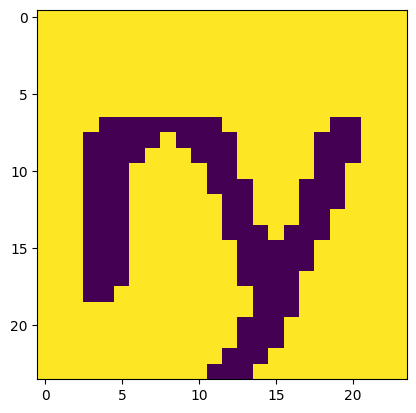

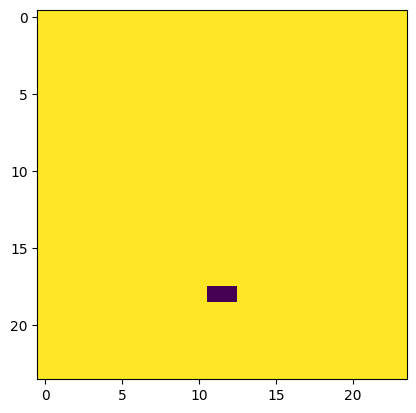

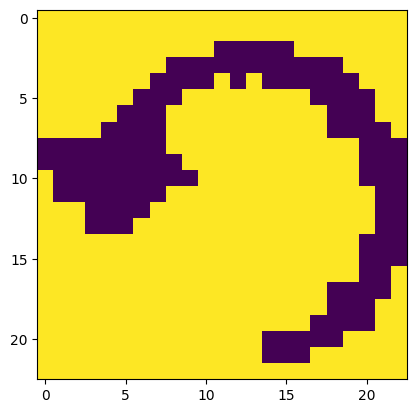

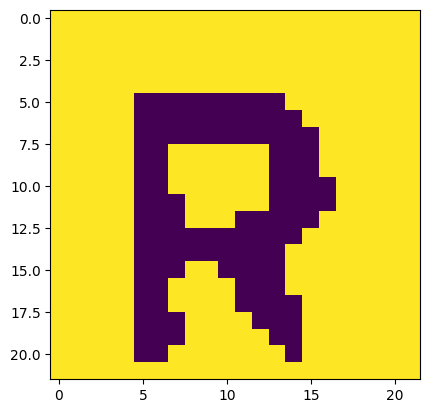

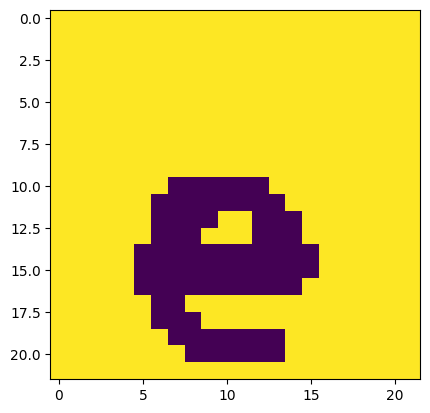

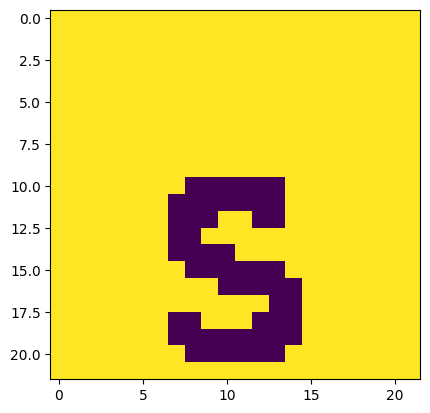

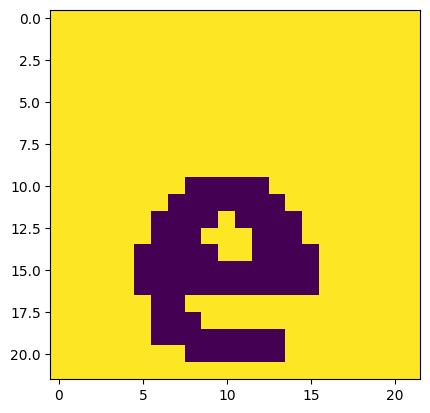

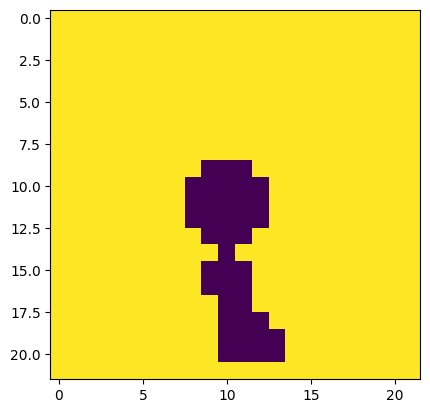

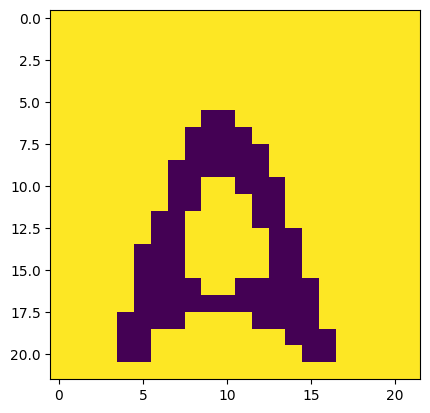

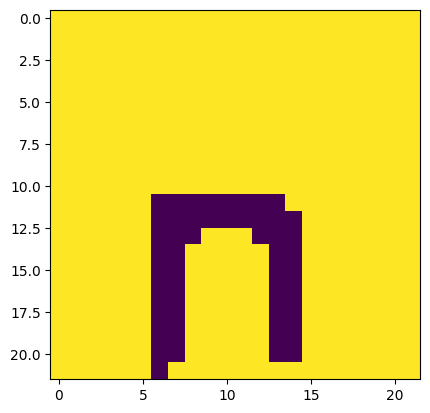

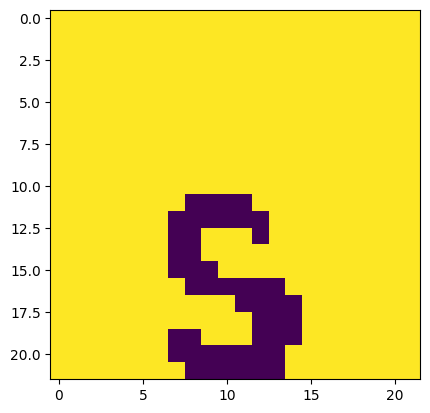

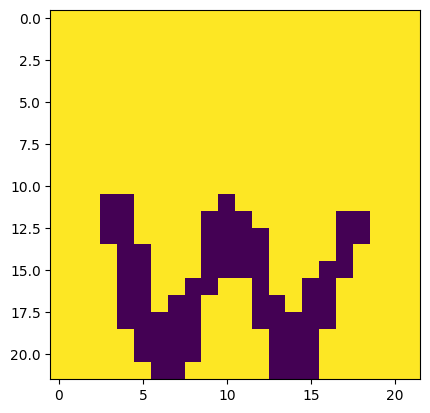

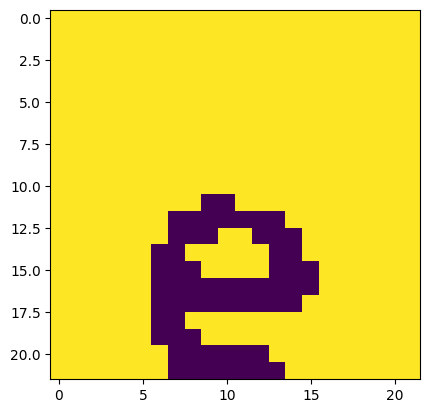

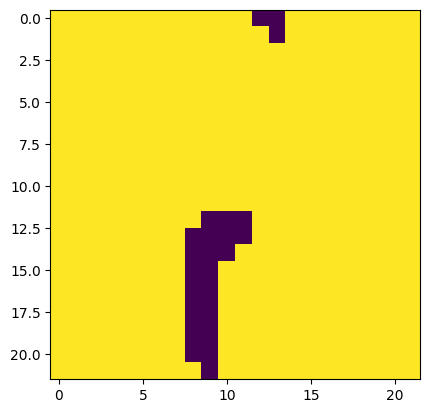

In [634]:
# Making the images square and then saving them in a folder and then downloading them

count = 0

for word in words:
  # Get the dimensions of the image
  height, width = word.shape

  # Calculate the padding needed to make the image square
  if height > width:
      padding = (height - width) // 2
      padding_dims = ((0, 0), (padding, height - width - padding))
  else:
      padding = (width - height) // 2
      padding_dims = ((padding, width - height - padding), (0, 0))

  # Add white borders to the image
  word = np.pad(word, padding_dims, mode='constant', constant_values=255)
  plt.imshow(word) #, cmap='gray'
  plt.show()

  image_path = os.path.join(save_dir, 'word'+str(count)+'.jpg')
  count = count + 1
  cv2.imwrite(image_path,word)



In [635]:
# Save the image in the directory
# image_path = os.path.join(save_dir, 'square_image.jpg')
# cv2.imwrite(image_path, img_square)

# count = 0
# for word in words:
#   image_path = os.path.join(save_dir, 'word'+str(count)+'.jpg')
#   count = count + 1
#   cv2.imwrite(image_path,word)

# Zip the folder
shutil.make_archive(save_dir, 'zip', save_dir)

# Provide a link to download the zipped folder
from google.colab import files
files.download(f'{save_dir}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Code by AYUSH AGARWAL

IIT BHU ECE'24

Infoedge DS